In [ ]:
!pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
client_id = '4e3582a2852e4d1dbc5631febb1c3f65'
client_secret = '8ff122559fb946288603a92f18a3af8d'

In [ ]:
import requests
import base64
import spotipy
import time

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from spotipy.oauth2 import SpotifyClientCredentials

In [ ]:
def get_access_token(client_id, client_secret):
    auth_url = "https://accounts.spotify.com/api/token"
    auth_header = {
        'Authorization' : f'Base{base64.b64encode((client_id + ":" + client_secret).encode()).decode()}'
    }
    auth_data = {
        'grant_type': 'client_credentials',
        'client_id': client_id,
        'client_secret': client_secret
    }
    auth_responses = requests.post(auth_url, data = auth_data, headers = auth_header)
    auth_responses_data = auth_responses.json()
    access_token = auth_responses_data['access_token']
    return access_token

In [ ]:
def get_access_token(client_id, client_secret):
    auth_url = "https://accounts.spotify.com/api/token"
    auth_header = {
        'Authorization': f'Basic {base64.b64encode((client_id + ":" + client_secret).encode()).decode()}'
    }
    auth_data = {
        'grant_type': 'client_credentials',
        'client_id': client_id,
        'client_secret': client_secret
    }
    auth_response = requests.post(auth_url, data=auth_data, headers=auth_header)

    if auth_response.status_code == 200:
        auth_response_data = auth_response.json()
        if 'access_token' in auth_response_data:
            access_token = auth_response_data['access_token']
            return access_token
        else:
            print("Error: 'access_token' key not found in response:", auth_response_data)
    else:
        print("Error:", auth_response.status_code, auth_response.text)

    return None

In [ ]:
def get_genres(access_token, limit=50, offset=0):
    genres_url = 'https://api.spotify.com/v1/browse/categories'
    headers = {'Authorization': f'Bearer {access_token}'}
    params = {
        'limit': limit,
        'offset': offset
    }
    response = requests.get(genres_url, headers=headers, params=params)
    genres_data = response.json()
    genres = [(category['id'], category['name']) for category in genres_data['categories']['items']]
    return genres

In [ ]:
def create_df(query_list, limit=50):
    data = {
        'Track ID': [],
        'Track name': [],
        'Artist name': [],
        'Popularity score': [],
        'Release year': [],
        'Genres': []
    }

    for query in query_list:
        search_results = sp.search(query, limit=limit, type='track')
        tracks = search_results['tracks']['items']

        for track in tracks:
            data['Track ID'].append(track['id'])
            data['Track name'].append(track['name'])
            data['Artist name'].append(track['artists'][0]['name'])
            data['Popularity score'].append(track['popularity'])
            data['Release year'].append(track['album']['release_date'][:4])
            data['Genres'].append(query)

        time.sleep(2)

    df = pd.DataFrame(data)
    return df

In [ ]:
client_id = '4e3582a2852e4d1dbc5631febb1c3f65'
client_secret = '8ff122559fb946288603a92f18a3af8d'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

access_token = get_access_token(client_id, client_secret)
def get_artist_genre(artist_id):
    artist = sp.artist(artist_id)
    return artist['genres']


In [ ]:
def get_audio_features(track_ids):
    features_list = []
    for i in range(0, len(track_ids), 50):
        batch = track_ids[i:i + 50]
        features_results = sp.audio_features(batch)
        features_list.extend([f for f in features_results if f is not None])
    return features_list

In [ ]:
genres = ['genres:"Made For You"','genres:"Vietnamese Music"','genres:"Pop"','genres:"K-pop"','genres:"Hip-Hop"','genres:"Metal"',
         'genres:"Fresh Finds"','genres:"EQUAL"','genres:"GLOW"','genres:"RADAR"','genres:"Discover"','genres:"Jazz"',
         'genres:"Karaoke"','genres:"Mood"','genres:"Rock"','genres:"Latin"','genres:"Dance/Electronic"','genres:"Trending"',
         'genres:"Indie"','genres:"Workout"','genres:"Country"','genres:"R&B"','genres:"Chill"','genres:"Classical"',
         'genres:"Sleep"','genres:"Party"','genres:"At Home"','genres:"Decades"','genres:"Love"','genres:"Folk & Acoustic"',
         'genres:"Focus"','genres:"Soul"','genres:"Kids & Family"','genres:"Gaming"','genres:"Anime"','genres:"TV & Movies"','genres:"Disney"',
         'genres:"Netflix"','genres:"Instrumental"','genres:"Wellness"','genres:"Punk"','genres:"Ambient"','genres:"Blues"','genres:"Cooking & Dining"',
         'genres:"Alternative"','genres:"Travel"','genres:"Caribbean"','genres:"Afro"']
df = create_df(genres, limit=50)

In [ ]:
print("List of genres: ")
for genre in genres:
    print(genre)


List of genres: 
genres:"Made For You"
genres:"Vietnamese Music"
genres:"Pop"
genres:"K-pop"
genres:"Hip-Hop"
genres:"Metal"
genres:"Fresh Finds"
genres:"EQUAL"
genres:"GLOW"
genres:"RADAR"
genres:"Discover"
genres:"Jazz"
genres:"Karaoke"
genres:"Mood"
genres:"Rock"
genres:"Latin"
genres:"Dance/Electronic"
genres:"Trending"
genres:"Indie"
genres:"Workout"
genres:"Country"
genres:"R&B"
genres:"Chill"
genres:"Classical"
genres:"Sleep"
genres:"Party"
genres:"At Home"
genres:"Decades"
genres:"Love"
genres:"Folk & Acoustic"
genres:"Focus"
genres:"Soul"
genres:"Kids & Family"
genres:"Gaming"
genres:"Anime"
genres:"TV & Movies"
genres:"Disney"
genres:"Netflix"
genres:"Instrumental"
genres:"Wellness"
genres:"Punk"
genres:"Ambient"
genres:"Blues"
genres:"Cooking & Dining"
genres:"Alternative"
genres:"Travel"
genres:"Caribbean"
genres:"Afro"


In [ ]:
df


Track ID                      Track name  \
0     42Wp7za1mm4C9B44CPAOb8                  lie2.me 167bpm   
1     3YJhM5Kq7lI7GN9XeWISXS                    Made for You   
2     1ALquZ0cRkLCu7QWejQJV9  afraid gear (tellmeimlostw/ou)   
3     0QPrSAJIoOdETXVbXcfuKz                      Number One   
4     1GkU4lkOzPmw0gjWDpXPyP                       Alifornia   
...                      ...                             ...   
2395  1xXRpwG1lv0pjBntcm4MV4                 Neva Duh Noting   
2396  5ebLM9iEfIcl6E5qVAwtnk                     Mama Africa   
2397  0dYgUPEXDKbZ36AvdtWn5p                     Afro Circus   
2398  5Mrir2OsNd9Vbng1aAxFQA             Psycho in 15 Genres   
2399  319HK6tHJu3zAzUGS7nxAK                   Afro Praise 3   

                   Artist name  Popularity score Release year  \
0                      es.cher                17         2023   
1               Cepi Valentino                 1         2019   
2                      es.cher                24         2023   
3                Miles Santini                16         2022   
4                Miles Santini                16         2022   
...                        ...               ...          ...   
2395                 Sir Nyles                18         2023   
2396  Brazilian Lounge Project                 8         2014   
2397              $hoopcrusher                24         2023   
2398           Anthony Vincent                 1         2018   
2399               Sonnie Badu                28         2012   

                     Genres  
0     genres:"Made For You"  
1     genres:"Made For You"  
2     genres:"Made For You"  
3     genres:"Made For You"  
4     genres:"Made For You"  
...                     ...  
2395          genres:"Afro"  
2396          genres:"Afro"  
2397          genres:"Afro"  
2398          genres:"Afro"  
2399          genres:"Afro"  

[2400 rows x 6 columns]

In [ ]:
track_ids = df['Track ID'].tolist()
audio_features = get_audio_features(track_ids)

audio_features_df = pd.DataFrame(audio_features)
merged_df = df.merge(audio_features_df, left_on='Track ID', right_on='id', how='inner')

In [ ]:
audio_features

In [ ]:
merged_df

merged_df.to_excel('merged_df.xlsx', index=False)

In [ ]:
unique_df = merged_df.drop_duplicates(subset='Track ID', keep='first')
unique_df

unique_df.to_excel('unique_df.xlsx', index=False)

In [ ]:
print(unique_df.columns)

Index(['Track ID', 'Track name', 'Artist name', 'Popularity score',
       'Release year', 'Genres', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')


In [ ]:
len(unique_df)

814

In [ ]:
filtered_df = unique_df[unique_df['Popularity score']>0]
filtered_df

filtered_df.to_excel('filted_unique.xlsx', index=False)

In [ ]:
len(filtered_df)

775

In [ ]:
top_10 = filtered_df.nlargest(10, 'Popularity score')

# Calculate the average Popularity Score
average_popularity_score = top_10['Popularity score'].mean()
print("Average Popularity Score of the top 10 tracks:", average_popularity_score)

Average Popularity Score of the top 10 tracks: 77.3


In [ ]:
average_scores_by_genre = filtered_df.groupby('Genres')['Popularity score'].mean()

print("Average Popularity Score of each genre:")
print(average_scores_by_genre)

Average Popularity Score of each genre:
Genres
genres:"Afro"                31.880000
genres:"Alternative"         26.730769
genres:"Ambient"             10.400000
genres:"Anime"               33.360000
genres:"At Home"              7.588235
genres:"Blues"               23.555556
genres:"Caribbean"           28.200000
genres:"Classical"           19.960000
genres:"Cooking & Dining"    17.400000
genres:"Dance/Electronic"    17.080000
genres:"Decades"             18.600000
genres:"Disney"              18.600000
genres:"EQUAL"               37.840000
genres:"Folk & Acoustic"     21.480000
genres:"Fresh Finds"         14.240000
genres:"GLOW"                12.200000
genres:"Gaming"              17.680000
genres:"Hip-Hop"              8.125000
genres:"Indie"               19.760000
genres:"Jazz"                11.760000
genres:"K-pop"               68.920000
genres:"Karaoke"             14.400000
genres:"Kids & Family"        6.000000
genres:"Latin"               15.480000
genres:"Love"    

In [ ]:
top_10_avg_scores_by_genre = filtered_df.groupby('Genres')['Popularity score'].nlargest(10).groupby('Genres').mean()

print("Average Popularity Score of the top 10 songs for each genre:")
print(top_10_avg_scores_by_genre)


Average Popularity Score of the top 10 songs for each genre:
Genres
genres:"Afro"                39.700000
genres:"Alternative"         37.100000
genres:"Ambient"             18.300000
genres:"Anime"               41.000000
genres:"At Home"             12.000000
genres:"Blues"               31.400000
genres:"Caribbean"           39.600000
genres:"Classical"           27.100000
genres:"Cooking & Dining"    24.500000
genres:"Dance/Electronic"    23.200000
genres:"Decades"             29.100000
genres:"Disney"              30.400000
genres:"EQUAL"               49.900000
genres:"Folk & Acoustic"     27.400000
genres:"Fresh Finds"         26.000000
genres:"GLOW"                12.200000
genres:"Gaming"              21.900000
genres:"Hip-Hop"              8.125000
genres:"Indie"               28.600000
genres:"Jazz"                17.400000
genres:"K-pop"               77.200000
genres:"Karaoke"             25.300000
genres:"Kids & Family"        6.000000
genres:"Latin"               26.000

In [ ]:
# Assuming filtered_df contains the necessary data

# Calculate the number of songs in the top 20%
top_20_percent = int(len(filtered_df) * 0.2)

# Group by genre and calculate the average Popularity Score of the top 20% songs for each genre
top_20_percent_avg_scores_by_genre = filtered_df.groupby('Genres')['Popularity score'].nlargest(top_20_percent).groupby('Genres').mean()

print("Average Popularity Score of the top 20% songs for each genre:")
print(top_20_percent_avg_scores_by_genre)


Average Popularity Score of the top 20% songs for each genre:
Genres
genres:"Afro"                31.880000
genres:"Alternative"         26.730769
genres:"Ambient"             10.400000
genres:"Anime"               33.360000
genres:"At Home"              7.588235
genres:"Blues"               23.555556
genres:"Caribbean"           28.200000
genres:"Classical"           19.960000
genres:"Cooking & Dining"    17.400000
genres:"Dance/Electronic"    17.080000
genres:"Decades"             18.600000
genres:"Disney"              18.600000
genres:"EQUAL"               37.840000
genres:"Folk & Acoustic"     21.480000
genres:"Fresh Finds"         14.240000
genres:"GLOW"                12.200000
genres:"Gaming"              17.680000
genres:"Hip-Hop"              8.125000
genres:"Indie"               19.760000
genres:"Jazz"                11.760000
genres:"K-pop"               68.920000
genres:"Karaoke"             14.400000
genres:"Kids & Family"        6.000000
genres:"Latin"               15.48

################################################################################

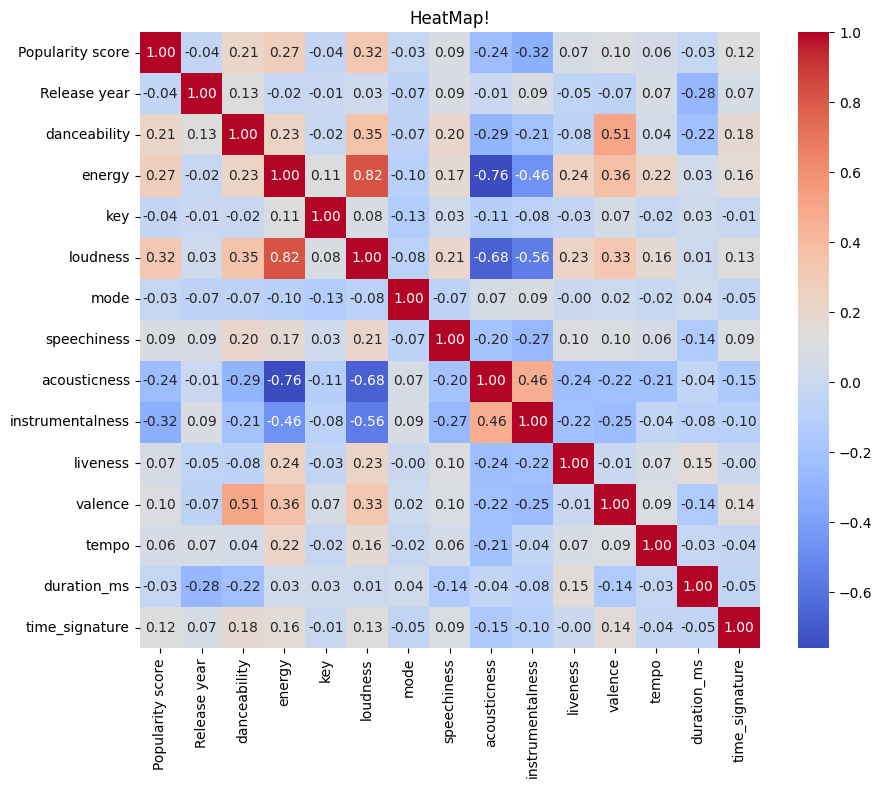

In [ ]:
numeric_df = filtered_df.drop(['Track ID', 'Track name', 'Artist name', 'Genres', 'type', 'id', 'uri', 'track_href', 'analysis_url'], axis=1)

# Calculating correlation matrix
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('HeatMap!')
plt.show()

################################################################################

Testing Plot

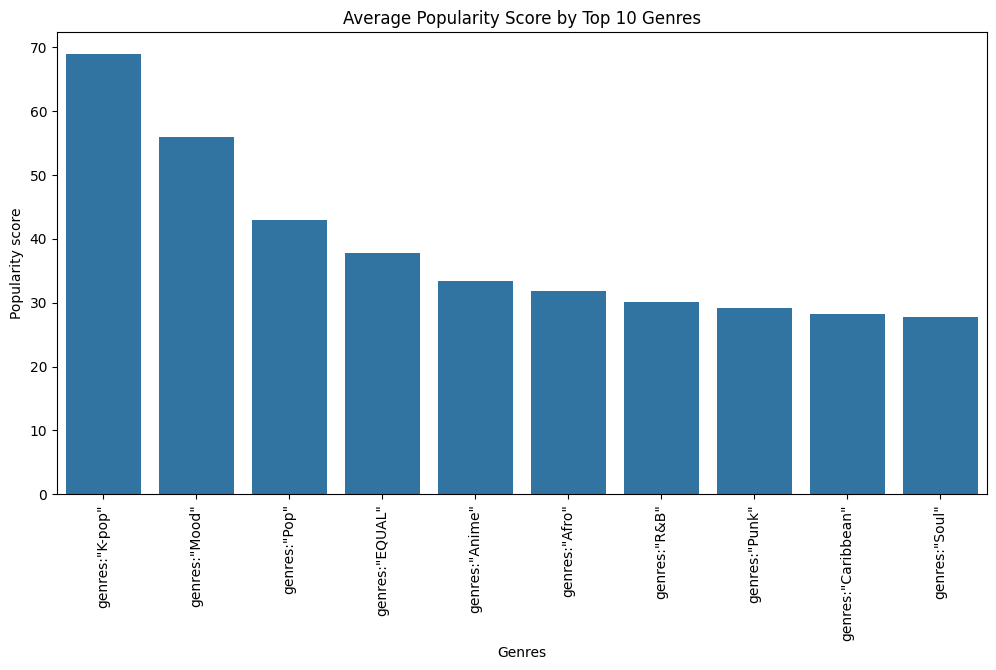

In [ ]:
genre_popularity = filtered_df.groupby('Genres')['Popularity score'].mean().reset_index()
genre_popularity = genre_popularity.sort_values('Popularity score', ascending=False)

genre_popularity = genre_popularity.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Genres', y='Popularity score', data= genre_popularity)
plt.xticks(rotation=90)
plt.title('Average Popularity Score by Top 10 Genres')
plt.show()

In [ ]:
max_popularity_score = df['Popularity score'].max()
print("Maximum popularity score:", max_popularity_score)

Maximum popularity score: 83


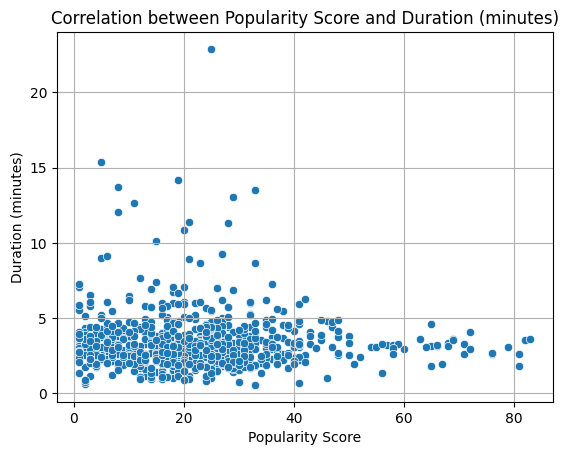

Correlation between Popularity Score and Duration (minutes): -0.025940043120750912


In [ ]:
duration_minutes = filtered_df['duration_ms'] / 60000

# Calculate correlation between popularity score and duration in minutes
correlation = filtered_df['Popularity score'].corr(duration_minutes)

# Create a scatter plot
sns.scatterplot(x='Popularity score', y=duration_minutes, data=filtered_df)
plt.title('Correlation between Popularity Score and Duration (minutes)')
plt.xlabel('Popularity Score')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.show()

print("Correlation between Popularity Score and Duration (minutes):", correlation)

Tương quan thời gian và độ phổ biến của bài hát

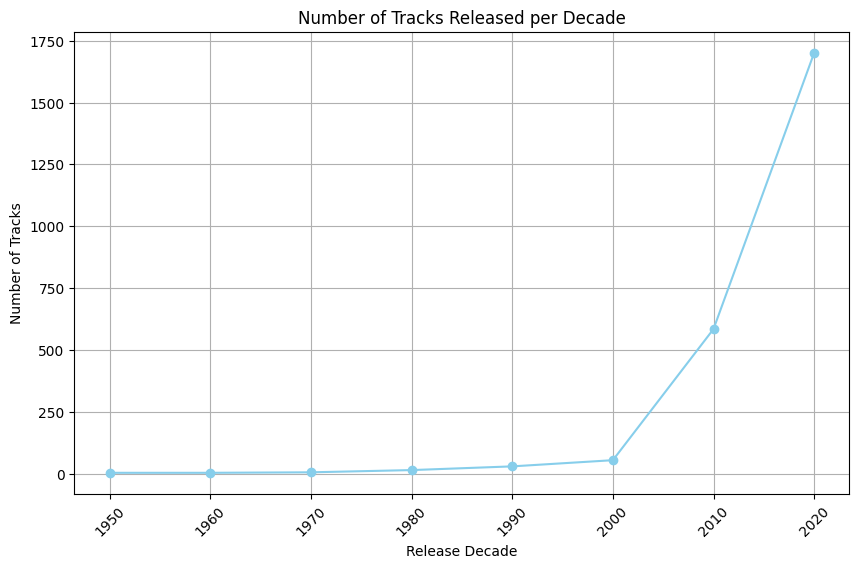

In [ ]:
# Assuming your DataFrame is named df
# Convert 'Release year' column to numeric type
df['Release year'] = pd.to_numeric(df['Release year'], errors='coerce')

# Drop rows with NaN values in 'Release year' column
df = df.dropna(subset=['Release year'])

# Group the data by 10-year intervals of release years and count the number of tracks in each interval
tracks_per_decade = df.groupby((df['Release year'] // 10) * 10).size()

# Create a line plot
plt.figure(figsize=(10, 6))
tracks_per_decade.plot(kind='line', marker='o', color='skyblue', linestyle='-')
plt.title('Number of Tracks Released per Decade')
plt.xlabel('Release Decade')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

################################################################################


Tính quan của các thông số âm thanh

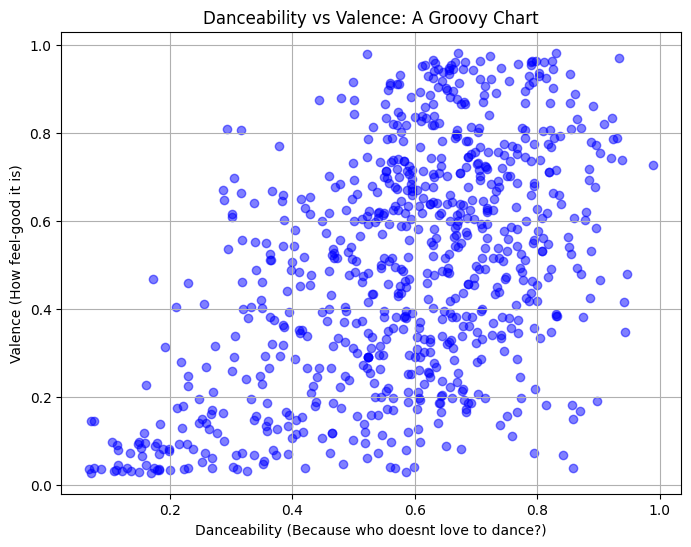

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['danceability'], filtered_df['valence'], color='blue', alpha=0.5)
plt.title('Danceability vs Valence: A Groovy Chart')
plt.xlabel('Danceability (Because who doesnt love to dance?)')
plt.ylabel('Valence (How feel-good it is)')
plt.grid(True)
plt.show()

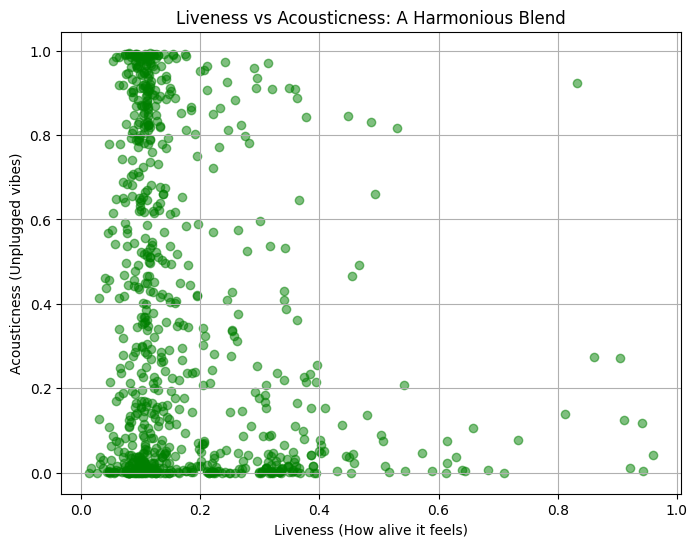

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['liveness'], filtered_df['acousticness'], color='green', alpha=0.5)
plt.title('Liveness vs Acousticness: A Harmonious Blend')
plt.xlabel('Liveness (How alive it feels)')
plt.ylabel('Acousticness (Unplugged vibes)')
plt.grid(True)
plt.show()

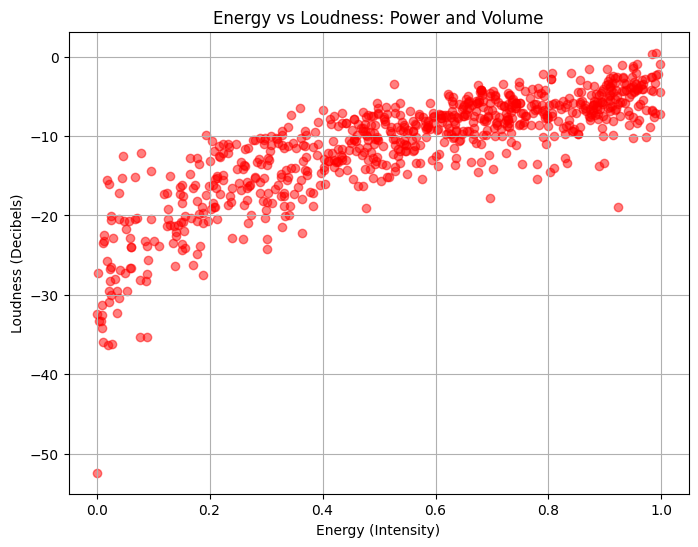

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['energy'], filtered_df['loudness'], color='red', alpha=0.5)
plt.title('Energy vs Loudness: Power and Volume')
plt.xlabel('Energy (Intensity)')
plt.ylabel('Loudness (Decibels)')
plt.grid(True)
plt.show()

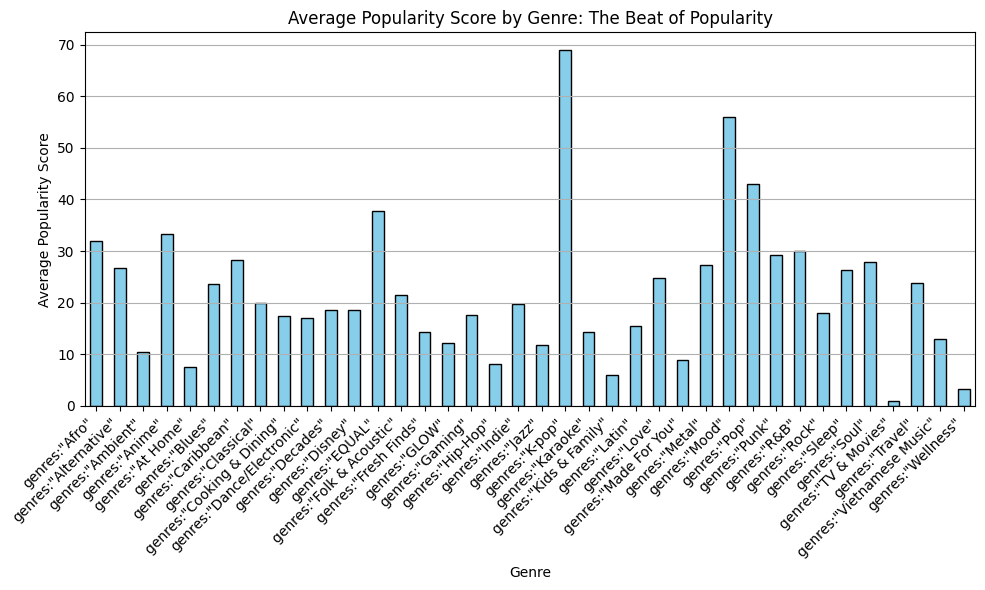

In [ ]:
plt.figure(figsize=(10, 6))
average_scores_by_genre.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Popularity Score by Genre: The Beat of Popularity')
plt.xlabel('Genre')
plt.ylabel('Average Popularity Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
average_scores_by_genre

Genres
genres:"Afro"                31.880000
genres:"Alternative"         26.730769
genres:"Ambient"             10.400000
genres:"Anime"               33.360000
genres:"At Home"              7.588235
genres:"Blues"               23.555556
genres:"Caribbean"           28.200000
genres:"Classical"           19.960000
genres:"Cooking & Dining"    17.400000
genres:"Dance/Electronic"    17.080000
genres:"Decades"             18.600000
genres:"Disney"              18.600000
genres:"EQUAL"               37.840000
genres:"Folk & Acoustic"     21.480000
genres:"Fresh Finds"         14.240000
genres:"GLOW"                12.200000
genres:"Gaming"              17.680000
genres:"Hip-Hop"              8.125000
genres:"Indie"               19.760000
genres:"Jazz"                11.760000
genres:"K-pop"               68.920000
genres:"Karaoke"             14.400000
genres:"Kids & Family"        6.000000
genres:"Latin"               15.480000
genres:"Love"                24.785714
genres:"Made For Y

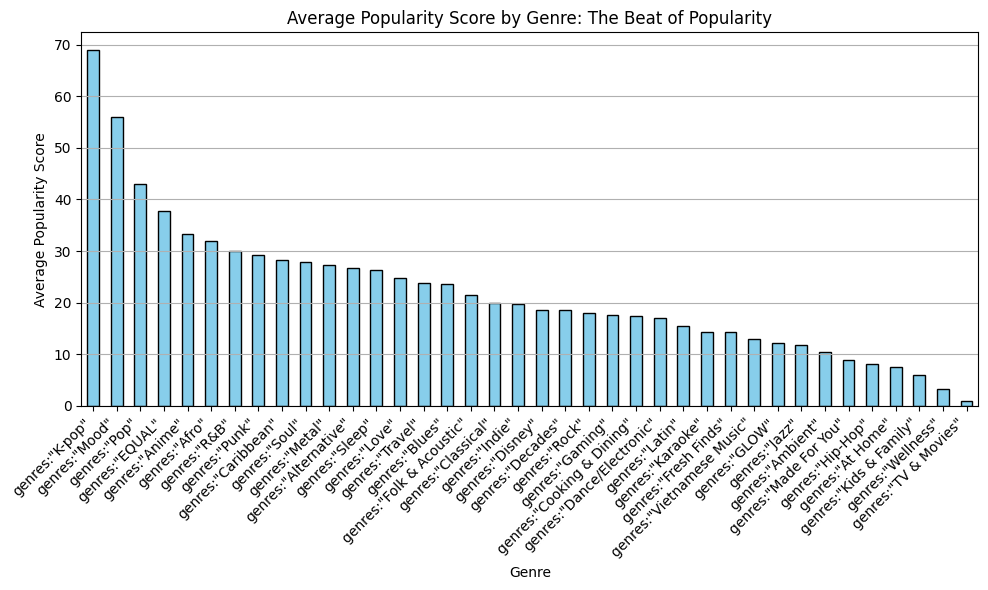

In [ ]:
# Sort the DataFrame by the average popularity score in descending order
average_scores_by_genre_sorted = average_scores_by_genre.sort_values()[::-1]

# Create the plot
plt.figure(figsize=(10, 6))
average_scores_by_genre_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Popularity Score by Genre: The Beat of Popularity')
plt.xlabel('Genre')
plt.ylabel('Average Popularity Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

những thông tin khác

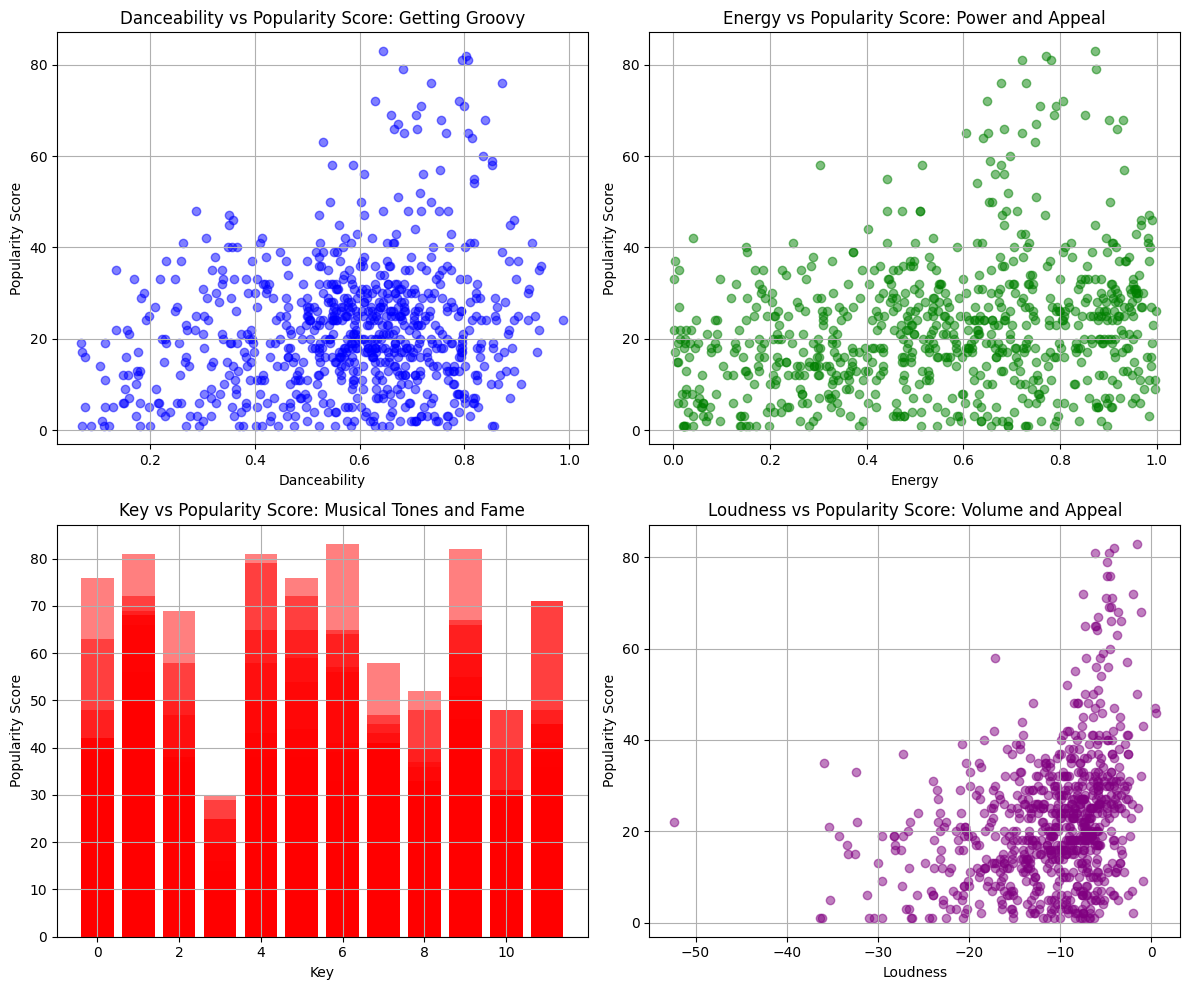

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Danceability vs Popularity Score
axs[0, 0].scatter(filtered_df['danceability'], filtered_df['Popularity score'], color='blue', alpha=0.5)
axs[0, 0].set_title('Danceability vs Popularity Score: Getting Groovy')
axs[0, 0].set_xlabel('Danceability')
axs[0, 0].set_ylabel('Popularity Score')
axs[0, 0].grid(True)

# Energy vs Popularity Score
axs[0, 1].scatter(filtered_df['energy'], filtered_df['Popularity score'], color='green', alpha=0.5)
axs[0, 1].set_title('Energy vs Popularity Score: Power and Appeal')
axs[0, 1].set_xlabel('Energy')
axs[0, 1].set_ylabel('Popularity Score')
axs[0, 1].grid(True)

# Key vs Popularity Score
axs[1, 0].bar(filtered_df['key'], filtered_df['Popularity score'], color='red', alpha=0.5)
axs[1, 0].set_title('Key vs Popularity Score: Musical Tones and Fame')
axs[1, 0].set_xlabel('Key')
axs[1, 0].set_ylabel('Popularity Score')
axs[1, 0].grid(True)

# Loudness vs Popularity Score
axs[1, 1].scatter(filtered_df['loudness'], filtered_df['Popularity score'], color='purple', alpha=0.5)
axs[1, 1].set_title('Loudness vs Popularity Score: Volume and Appeal')
axs[1, 1].set_xlabel('Loudness')
axs[1, 1].set_ylabel('Popularity Score')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

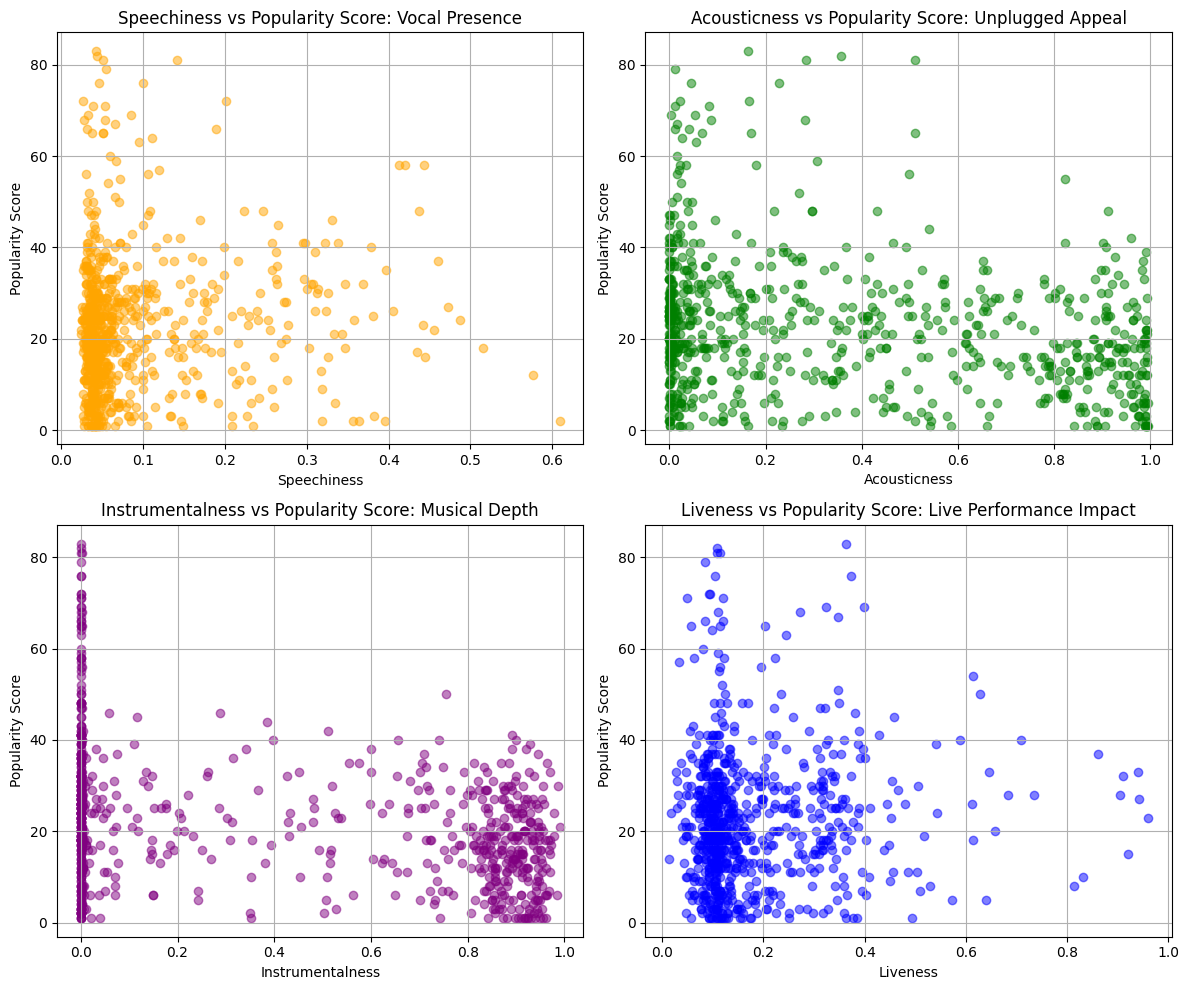

In [ ]:
# Assuming filtered_df contains the necessary data

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Speechiness vs Popularity Score
axs[0, 0].scatter(filtered_df['speechiness'], filtered_df['Popularity score'], color='orange', alpha=0.5)
axs[0, 0].set_title('Speechiness vs Popularity Score: Vocal Presence')
axs[0, 0].set_xlabel('Speechiness')
axs[0, 0].set_ylabel('Popularity Score')
axs[0, 0].grid(True)

# Acousticness vs Popularity Score
axs[0, 1].scatter(filtered_df['acousticness'], filtered_df['Popularity score'], color='green', alpha=0.5)
axs[0, 1].set_title('Acousticness vs Popularity Score: Unplugged Appeal')
axs[0, 1].set_xlabel('Acousticness')
axs[0, 1].set_ylabel('Popularity Score')
axs[0, 1].grid(True)

# Instrumentalness vs Popularity Score
axs[1, 0].scatter(filtered_df['instrumentalness'], filtered_df['Popularity score'], color='purple', alpha=0.5)
axs[1, 0].set_title('Instrumentalness vs Popularity Score: Musical Depth')
axs[1, 0].set_xlabel('Instrumentalness')
axs[1, 0].set_ylabel('Popularity Score')
axs[1, 0].grid(True)

# Liveness vs Popularity Score
axs[1, 1].scatter(filtered_df['liveness'], filtered_df['Popularity score'], color='blue', alpha=0.5)
axs[1, 1].set_title('Liveness vs Popularity Score: Live Performance Impact')
axs[1, 1].set_xlabel('Liveness')
axs[1, 1].set_ylabel('Popularity Score')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


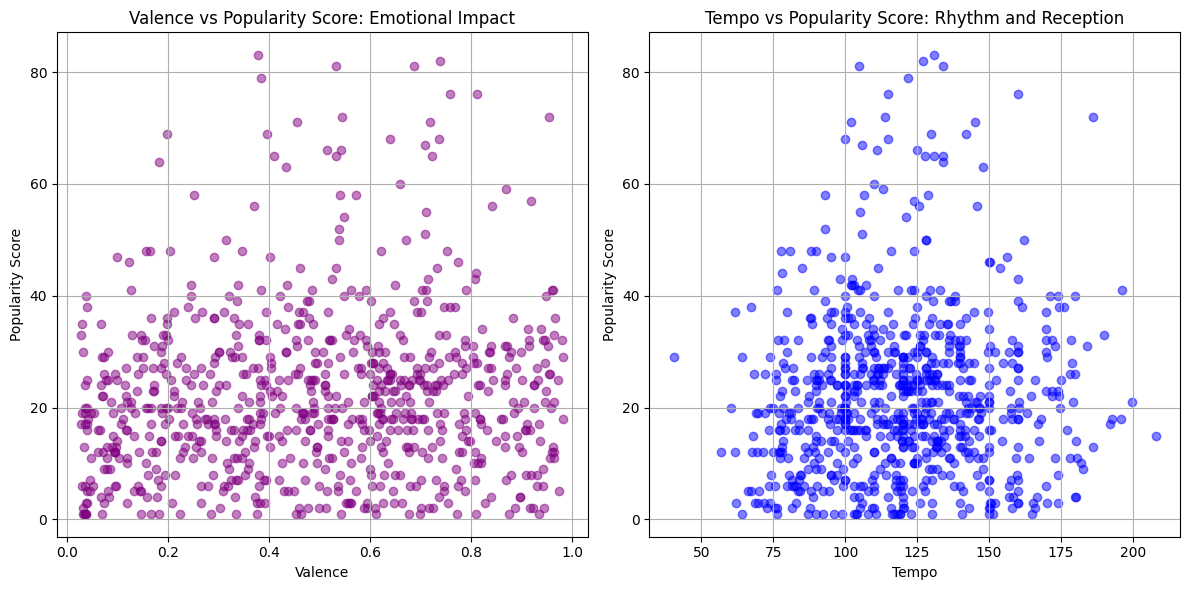

In [ ]:

# Assuming filtered_df contains the necessary data

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Valence vs Popularity Score
axs[0].scatter(filtered_df['valence'], filtered_df['Popularity score'], color='purple', alpha=0.5)
axs[0].set_title('Valence vs Popularity Score: Emotional Impact')
axs[0].set_xlabel('Valence')
axs[0].set_ylabel('Popularity Score')
axs[0].grid(True)

# Tempo vs Popularity Score
axs[1].scatter(filtered_df['tempo'], filtered_df['Popularity score'], color='blue', alpha=0.5)
axs[1].set_title('Tempo vs Popularity Score: Rhythm and Reception')
axs[1].set_xlabel('Tempo')
axs[1].set_ylabel('Popularity Score')
axs[1].grid(True)

plt.tight_layout()
plt.show()



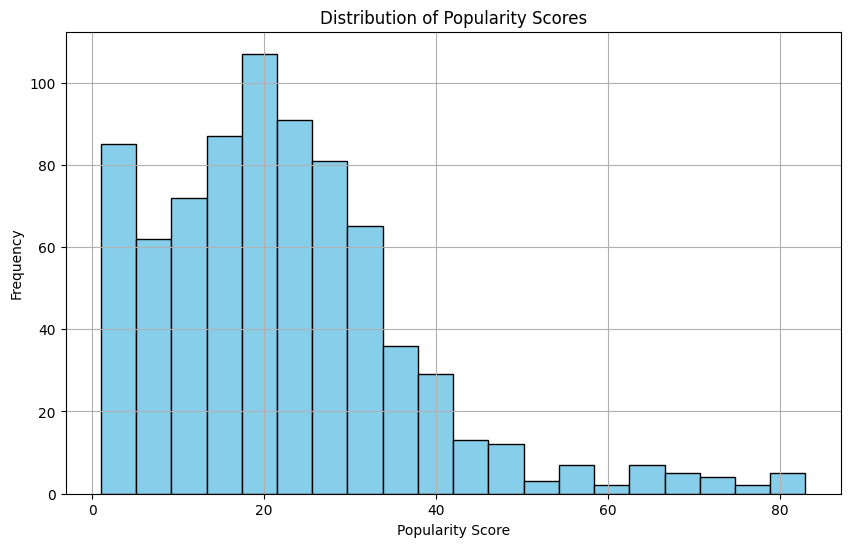

In [ ]:
# Assuming filtered_df contains the necessary data

plt.figure(figsize=(10, 6))
plt.hist(filtered_df['Popularity score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


^ This can help identify outliers or trends in popularity. ^

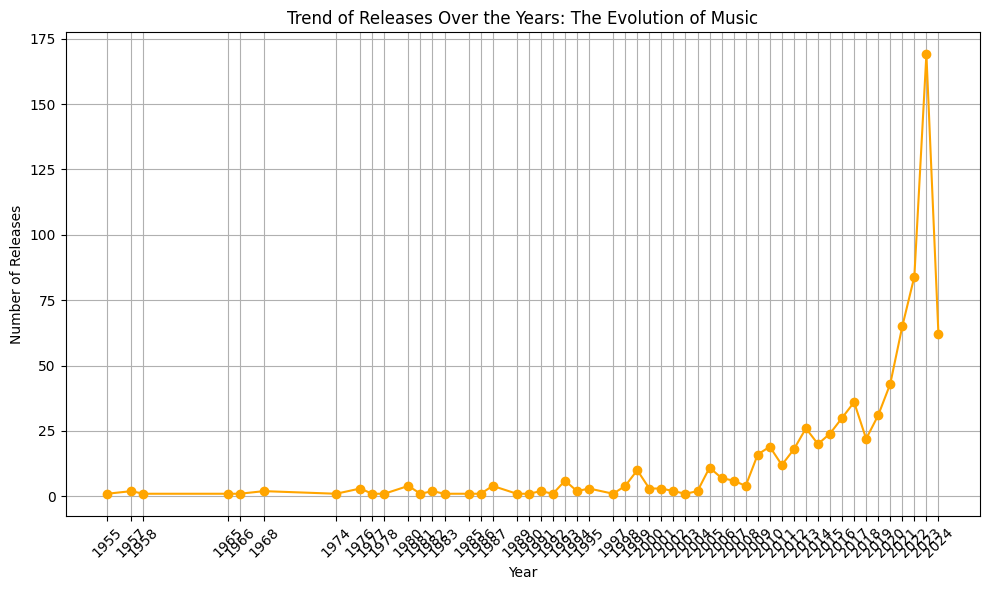

In [ ]:
# Assuming filtered_df contains the necessary data

# Convert release year to datetime
filtered_df['Release year'] = pd.to_datetime(filtered_df['Release year'], format='%Y')

# Group by release year and count the number of releases
release_trend = filtered_df.groupby(filtered_df['Release year'].dt.year).size()

plt.figure(figsize=(10, 6))
plt.plot(release_trend.index, release_trend.values, marker='o', color='orange')
plt.title('Trend of Releases Over the Years: The Evolution of Music')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.xticks(release_trend.index, rotation=45)
plt.tight_layout()
plt.show()


^ This can provide insights into the evolution of music over time. ^

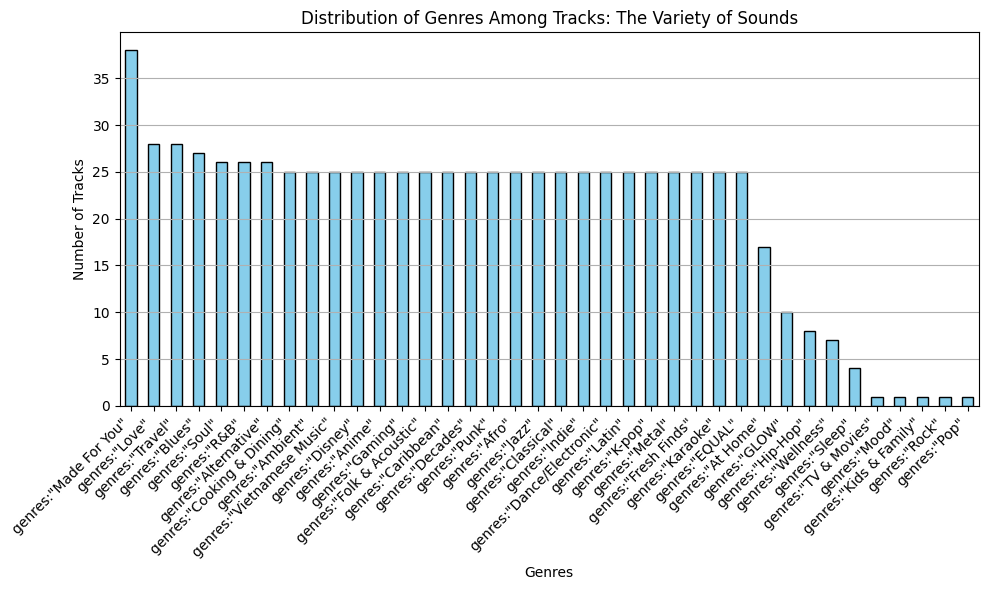

In [ ]:
# Assuming filtered_df contains the necessary data

# Count the occurrences of each genre
genre_counts = filtered_df['Genres'].value_counts()

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Genres Among Tracks: The Variety of Sounds')
plt.xlabel('Genres')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

^This can help understand the diversity of genres in the dataset.^

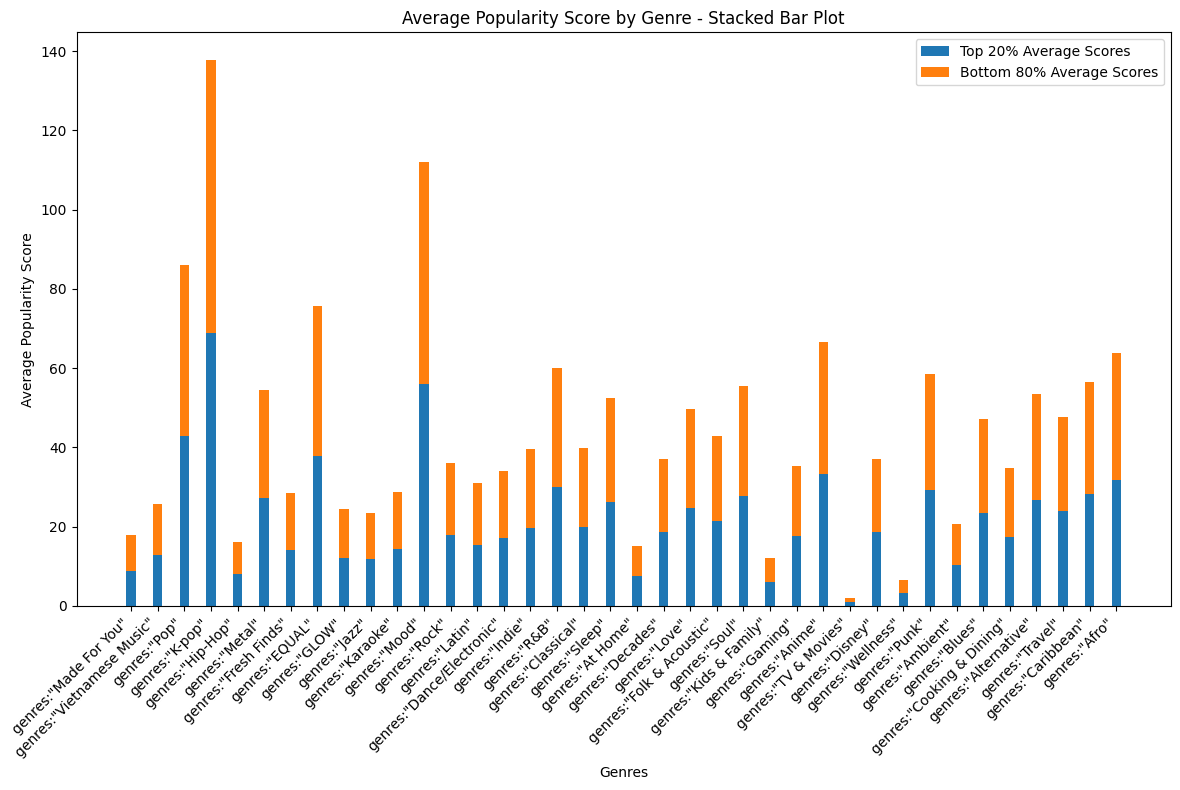

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming filtered_df contains the necessary data

# Calculate the number of songs in the top 20%
top_20_percent = int(len(filtered_df) * 0.2)

# Calculate the number of songs in the bottom 80%
bottom_80_percent = len(filtered_df) - top_20_percent

# Group by genre and calculate the average Popularity Score of the top 20% songs for each genre
top_20_percent_avg_scores_by_genre = filtered_df.groupby('Genres')['Popularity score'].nlargest(top_20_percent).groupby('Genres').mean()

# Group by genre and calculate the average Popularity Score of the bottom 80% songs for each genre
bottom_80_percent_avg_scores_by_genre = filtered_df.groupby('Genres')['Popularity score'].nsmallest(bottom_80_percent).groupby('Genres').mean()

# Get the genres
genres = filtered_df['Genres'].unique()

# Get the average scores for each genre
top_20_percent_scores = [top_20_percent_avg_scores_by_genre.get(genre, 0) for genre in genres]
bottom_80_percent_scores = [bottom_80_percent_avg_scores_by_genre.get(genre, 0) for genre in genres]

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35
index = np.arange(len(genres))

# Plot the top 20% scores
bar1 = ax.bar(index, top_20_percent_scores, bar_width, label='Top 20% Average Scores')

# Plot the bottom 80% scores on top of the top 20% scores
bar2 = ax.bar(index, bottom_80_percent_scores, bar_width, label='Bottom 80% Average Scores', bottom=top_20_percent_scores)

ax.set_xlabel('Genres')
ax.set_ylabel('Average Popularity Score')
ax.set_title('Average Popularity Score by Genre - Stacked Bar Plot')
ax.set_xticks(index)
ax.set_xticklabels(genres, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


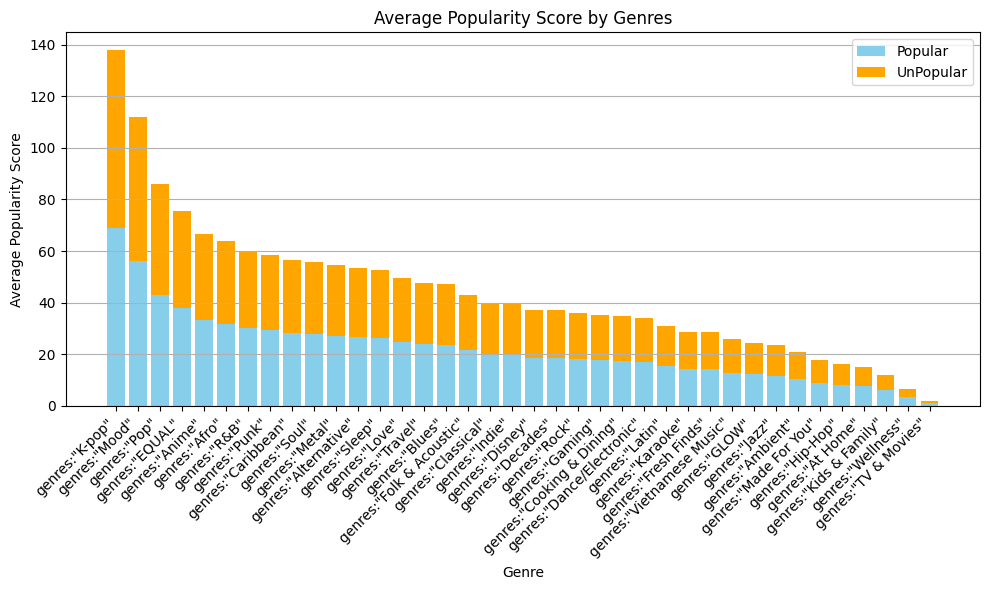

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming top_20_percent_avg_scores_by_genre and filtered_df are calculated previously

# Calculate the average of the top 20% highest popularity scores for each genre
top_20_percent_avg_scores = top_20_percent_avg_scores_by_genre.values

# Calculate the average of the remaining 80% lowest popularity scores for each genre
bottom_80_percent_avg_scores_by_genre = filtered_df.groupby('Genres')['Popularity score'].nsmallest(int(len(filtered_df) * 0.8)).groupby('Genres').mean()
bottom_80_percent_avg_scores = bottom_80_percent_avg_scores_by_genre.values

genres = top_20_percent_avg_scores_by_genre.index

# Sort the genres by the average popularity score of the top 20% highest
sorted_indices = np.argsort(top_20_percent_avg_scores)[::-1]

# Plotting the stacked bar plot
plt.figure(figsize=(10, 6))
plt.bar(genres[sorted_indices], top_20_percent_avg_scores[sorted_indices], label='Popular', color='skyblue')
plt.bar(genres[sorted_indices], bottom_80_percent_avg_scores[sorted_indices], label='UnPopular', color='orange', bottom=top_20_percent_avg_scores[sorted_indices])
plt.title('Average Popularity Score by Genres')
plt.xlabel('Genre')
plt.ylabel('Average Popularity Score')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


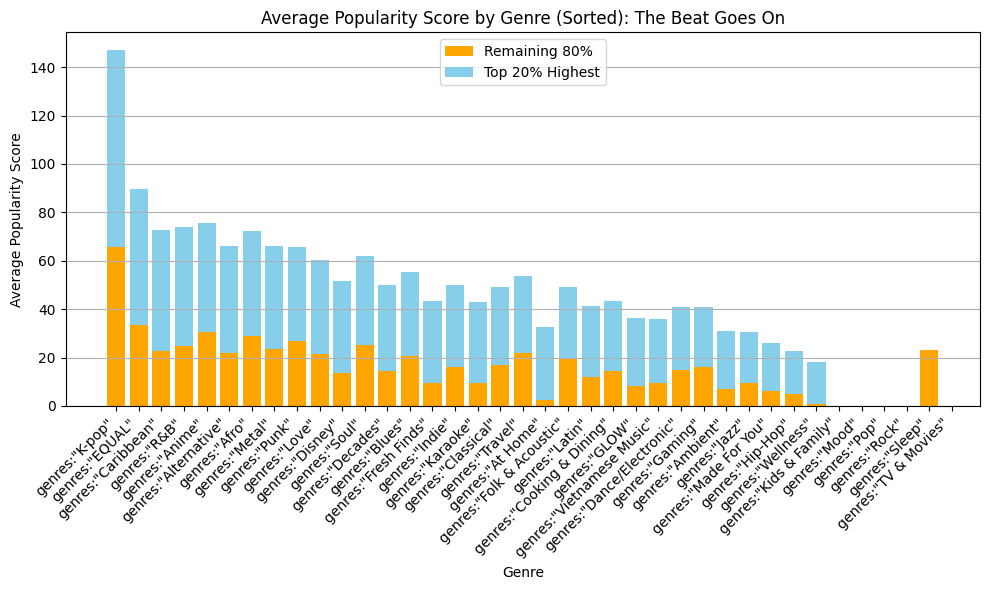

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the top 20% of songs with the highest scores in each genre
top_20_percent_scores = filtered_df.groupby('Genres')['Popularity score'].apply(lambda x: x.nlargest(int(len(x) * 0.2)).mean())

# Calculate the remaining 80% of songs in each genre
bottom_80_percent_scores = filtered_df.groupby('Genres')['Popularity score'].apply(lambda x: x.nsmallest(int(len(x) * 0.8)).mean())

# Sort genres based on the average of the top 20% highest popularity scores
top_20_percent_scores_sorted = top_20_percent_scores.sort_values(ascending=False)
genres_sorted = top_20_percent_scores_sorted.index
indices_sorted = np.arange(len(genres_sorted))

# Plotting the sorted stacked bar plot
plt.figure(figsize=(10, 6))
plt.bar(indices_sorted, bottom_80_percent_scores[genres_sorted], color='orange', label='Remaining 80%')
plt.bar(indices_sorted, top_20_percent_scores_sorted, color='skyblue', label='Top 20% Highest', bottom=bottom_80_percent_scores[genres_sorted])
plt.title('Average Popularity Score by Genre (Sorted): The Beat Goes On')
plt.xlabel('Genre')
plt.ylabel('Average Popularity Score')
plt.xticks(indices_sorted, genres_sorted, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Number of Tracks')

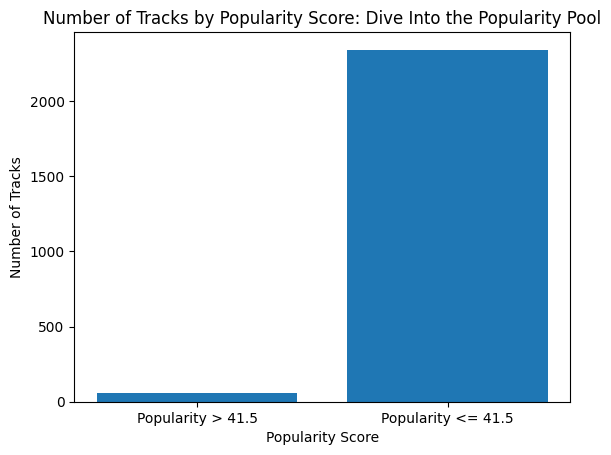

In [ ]:
more_than_415_count = (df['Popularity score'] > 41.5).sum()
less_than_415_count = (df['Popularity score'] <= 41.5).sum()

# Create a bar plot
plt.bar(['Popularity > 41.5', 'Popularity <= 41.5'], [more_than_415_count, less_than_415_count])
plt.title('Number of Tracks by Popularity Score: Dive Into the Popularity Pool')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Tracks')



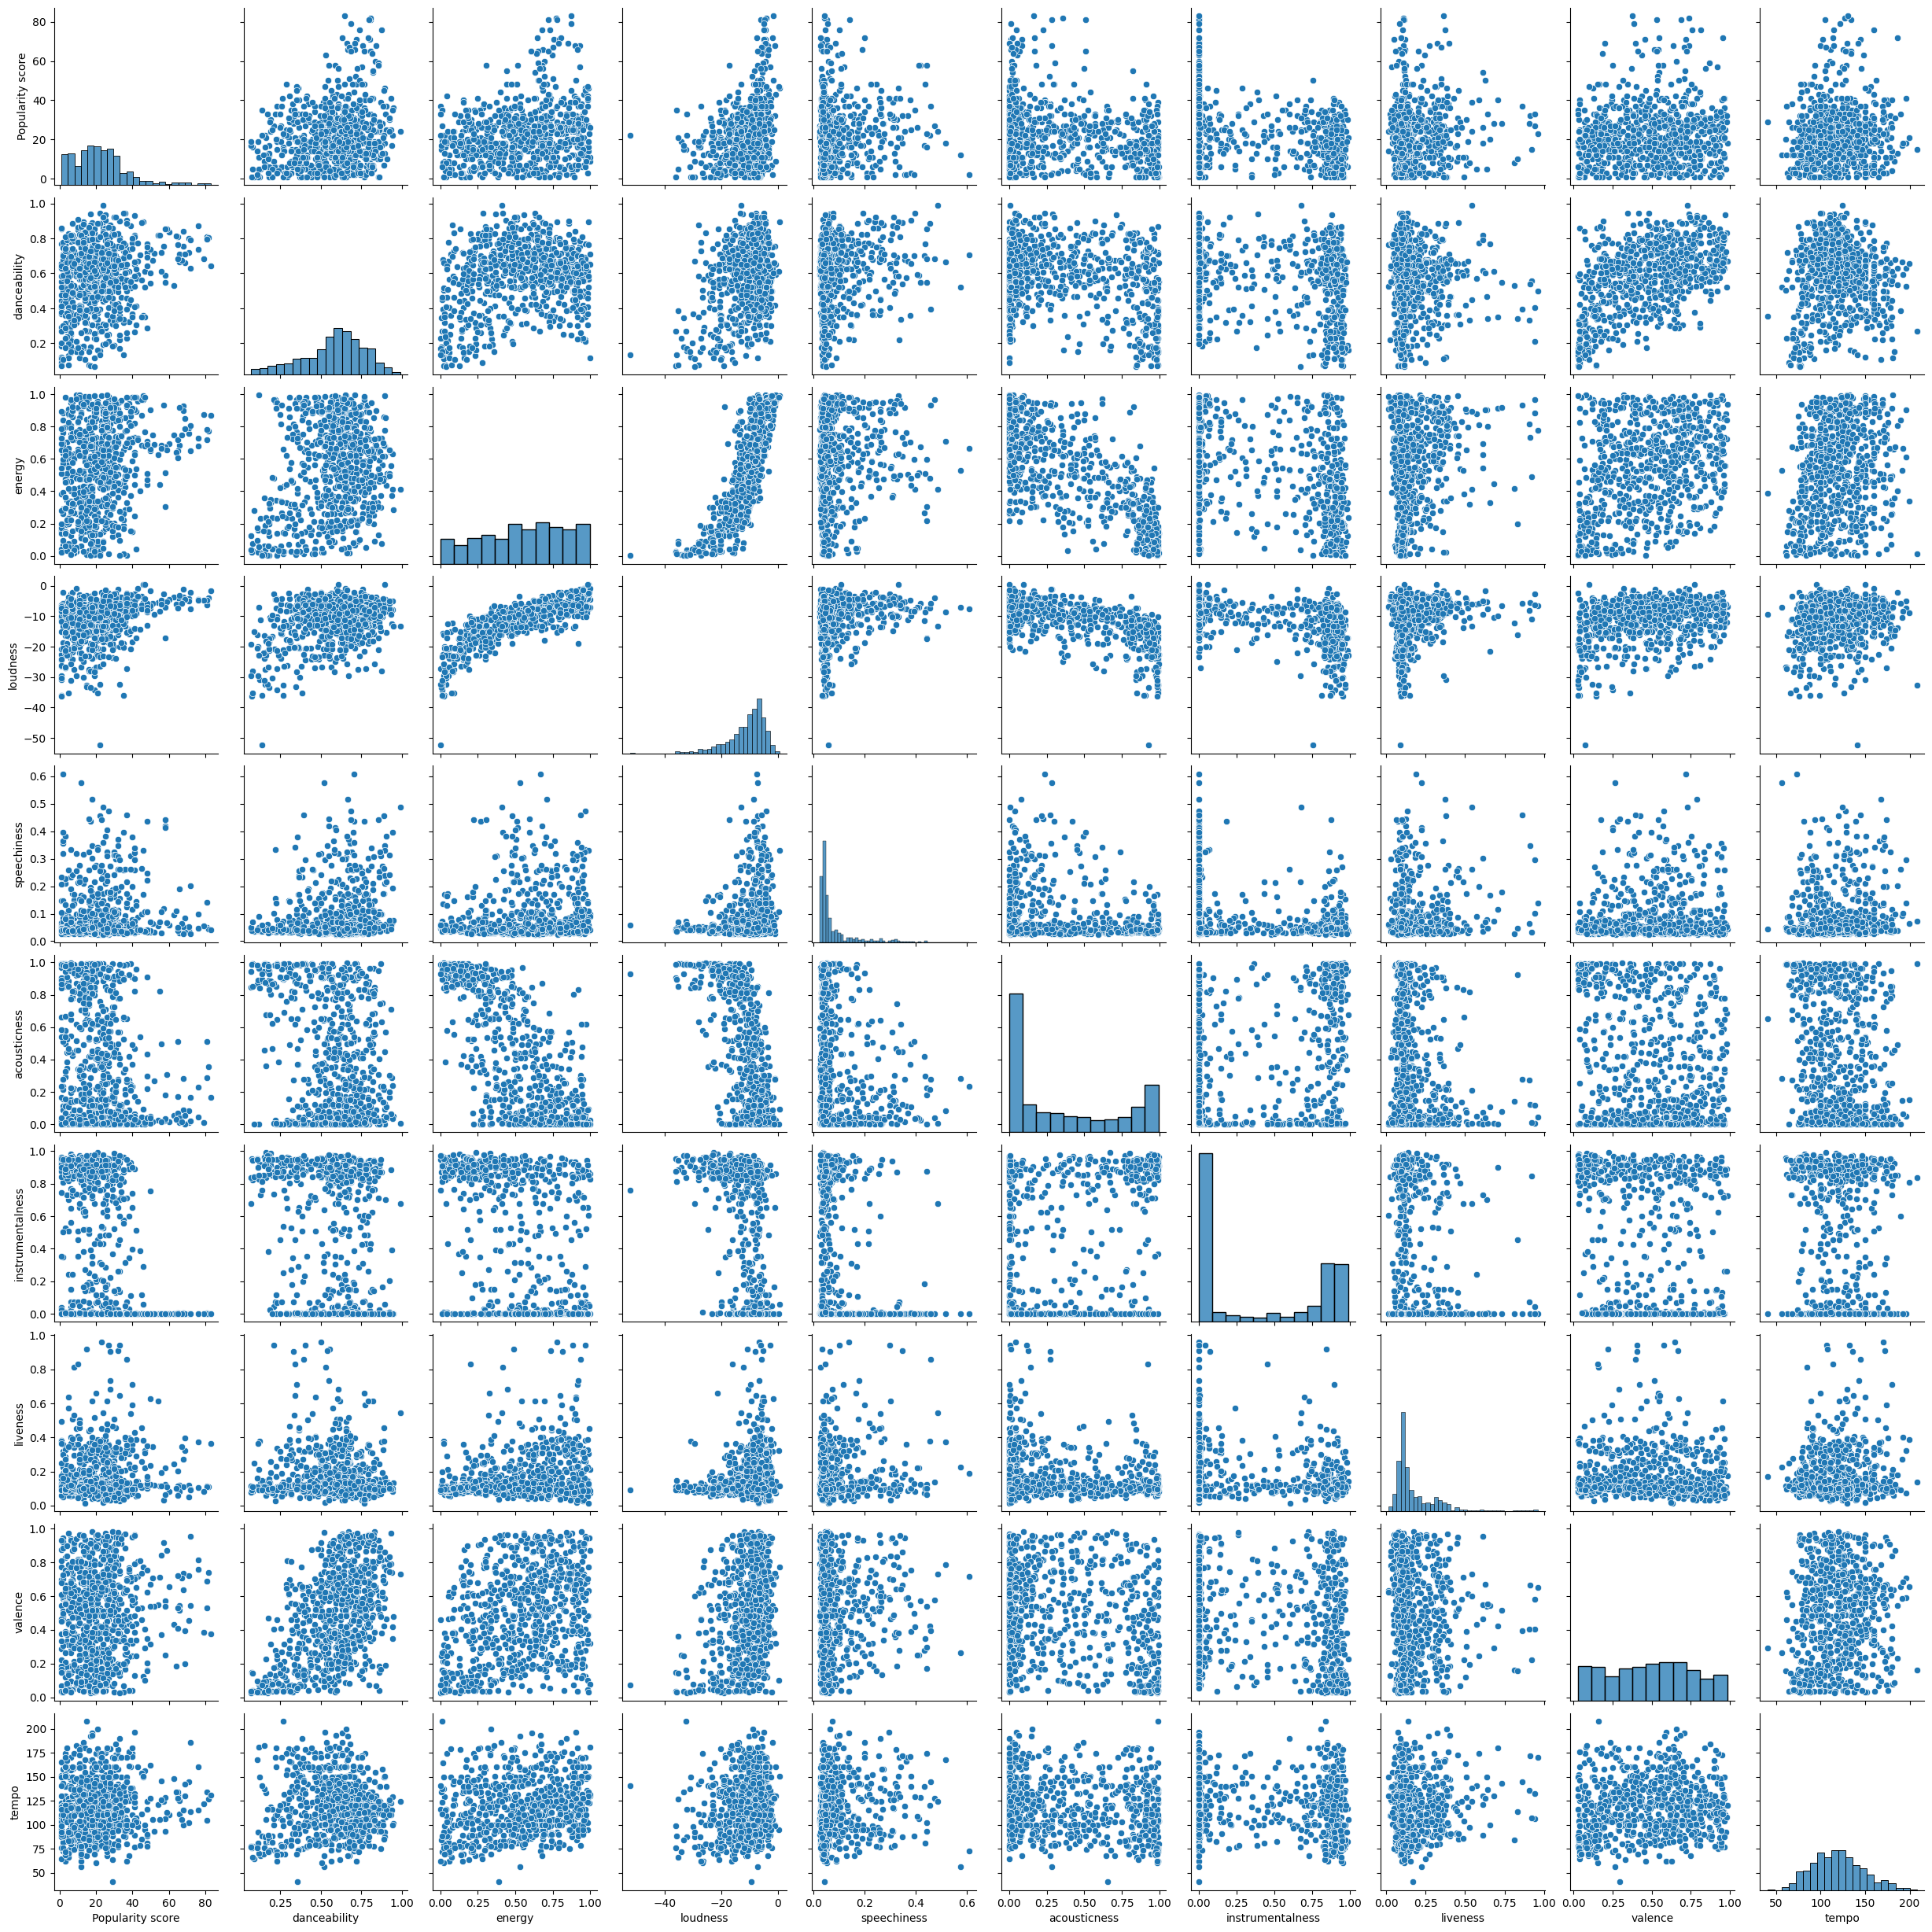

In [ ]:
# Define the columns you want to include in the matrix
columns = ['Popularity score','danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Create a pairplot using Seaborn
sns.pairplot(filtered_df[columns])

# Show the plot
plt.show()

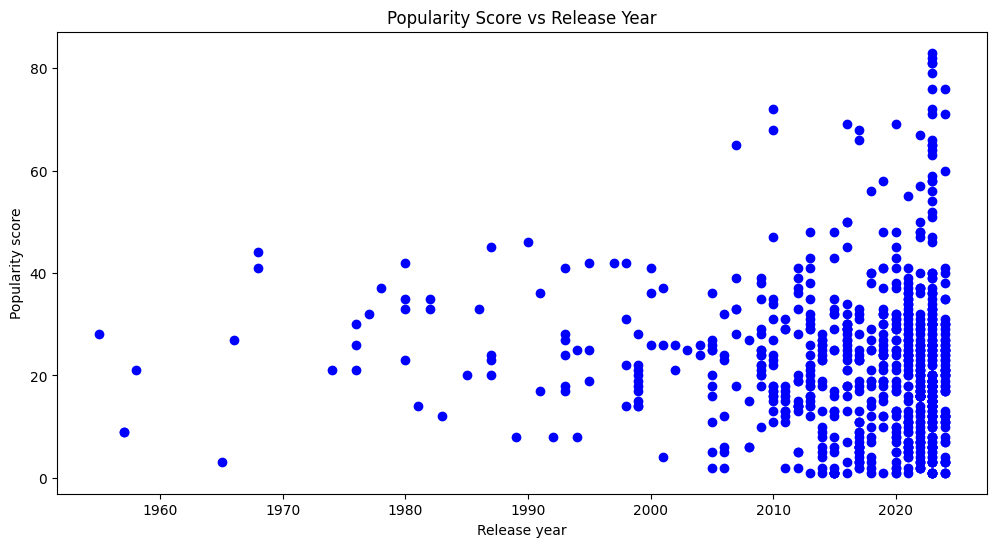

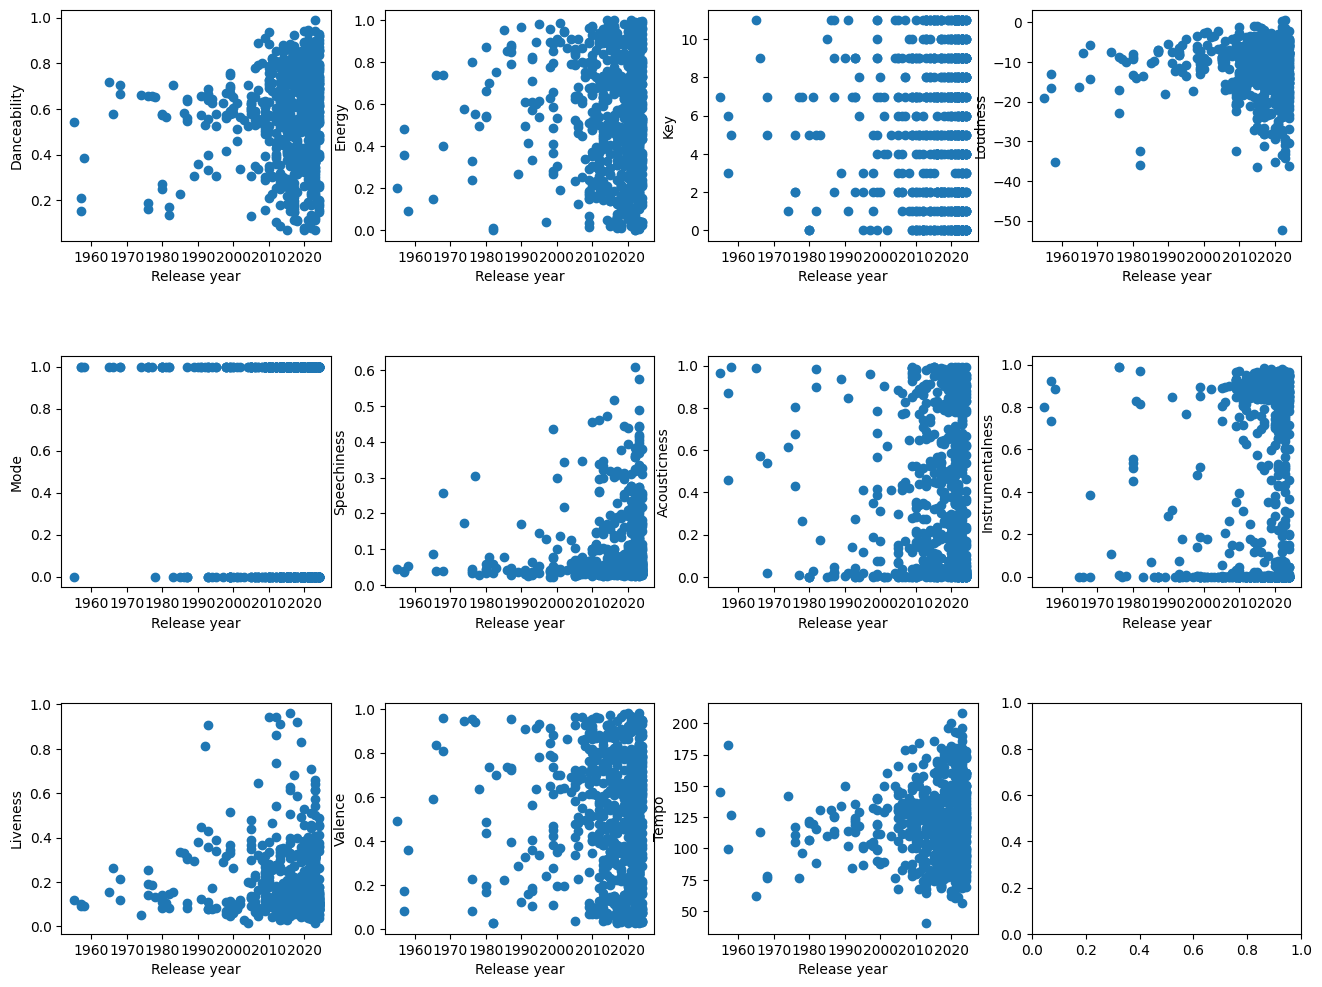

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(filtered_df["Release year"], filtered_df["Popularity score"], color='blue')
plt.xlabel('Release year')
plt.ylabel('Popularity score')
plt.title('Popularity Score vs Release Year')

fig, axs = plt.subplots(3, 4, figsize=(16, 12))
plt.subplots_adjust(hspace=0.5)

features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
for i, feature in enumerate(features):
    row = i // 4
    col = i % 4
    axs[row, col].scatter(filtered_df["Release year"], filtered_df[feature])
    axs[row, col].set_xlabel('Release year')
    axs[row, col].set_ylabel(feature.capitalize())

plt.show()

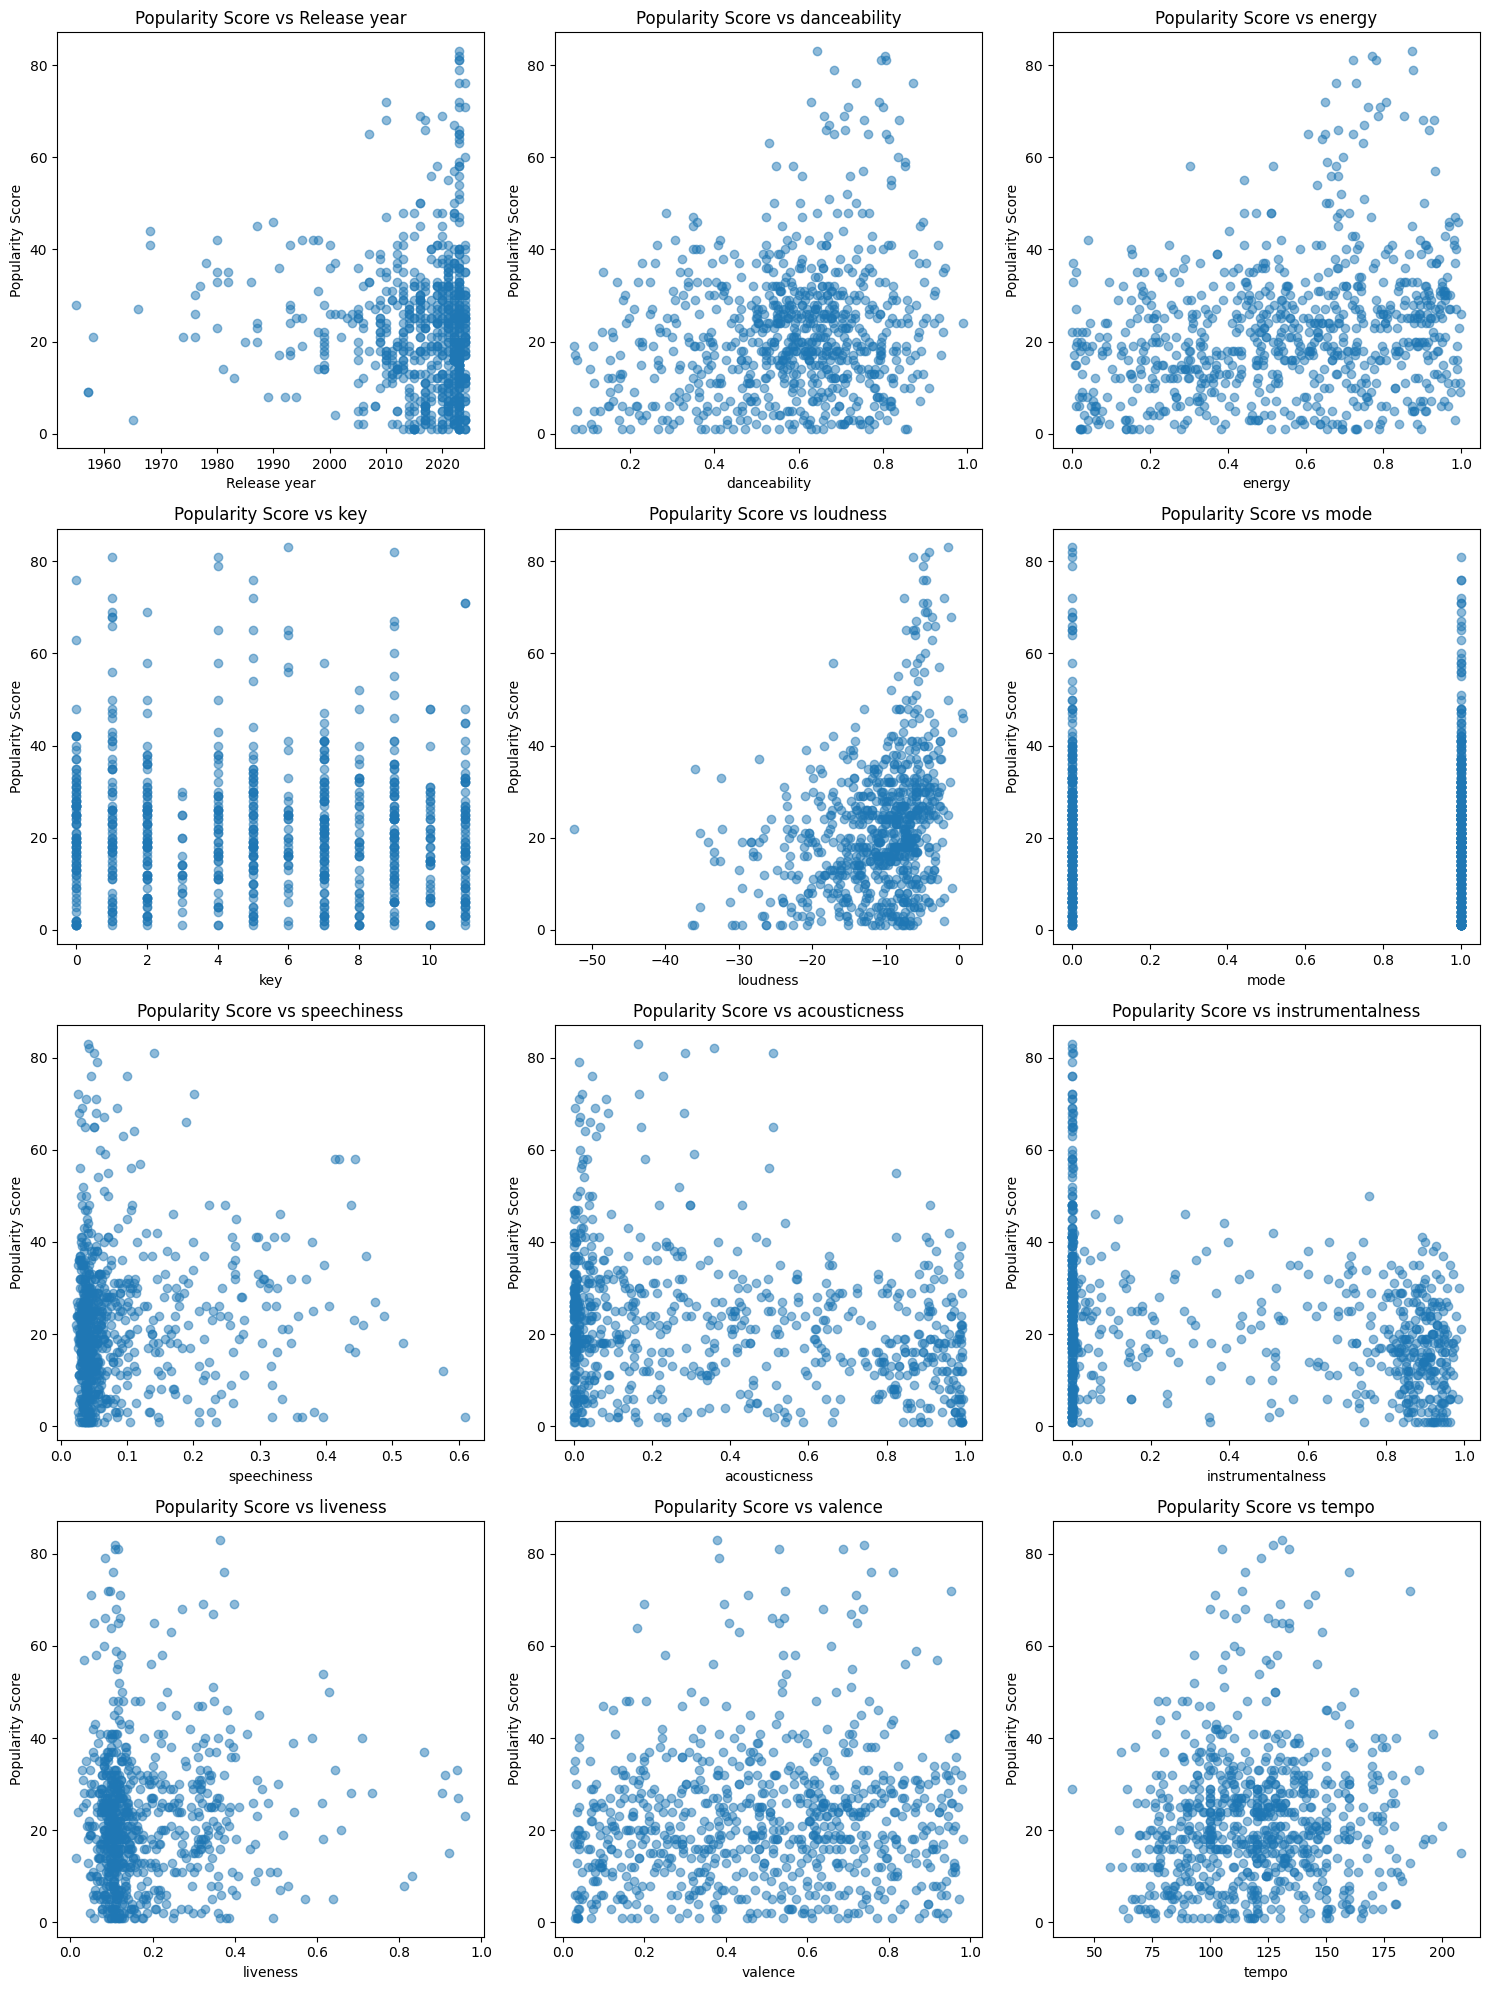

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your filtered data stored in a DataFrame called 'filtered_df'
# Replace 'filtered_df' with the name of your DataFrame if it's different

# Define the features you want to include in the scatterplot
features = ['Release year', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Calculate number of rows and columns for subplots
num_rows = len(features) // 3 + (len(features) % 3 > 0)
num_cols = min(len(features), 3)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Flatten axes array if there is only one row
if num_rows == 1:
    axes = [axes]

# Loop through each feature and create a scatterplot
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    axes[row][col].scatter(filtered_df[feature], filtered_df['Popularity score'], alpha=0.5)
    axes[row][col].set_title('Popularity Score vs ' + feature)
    axes[row][col].set_xlabel(feature)
    axes[row][col].set_ylabel('Popularity Score')

# Hide empty subplots
for i in range(len(features), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row][col].axis('off')

plt.tight_layout()
plt.show()


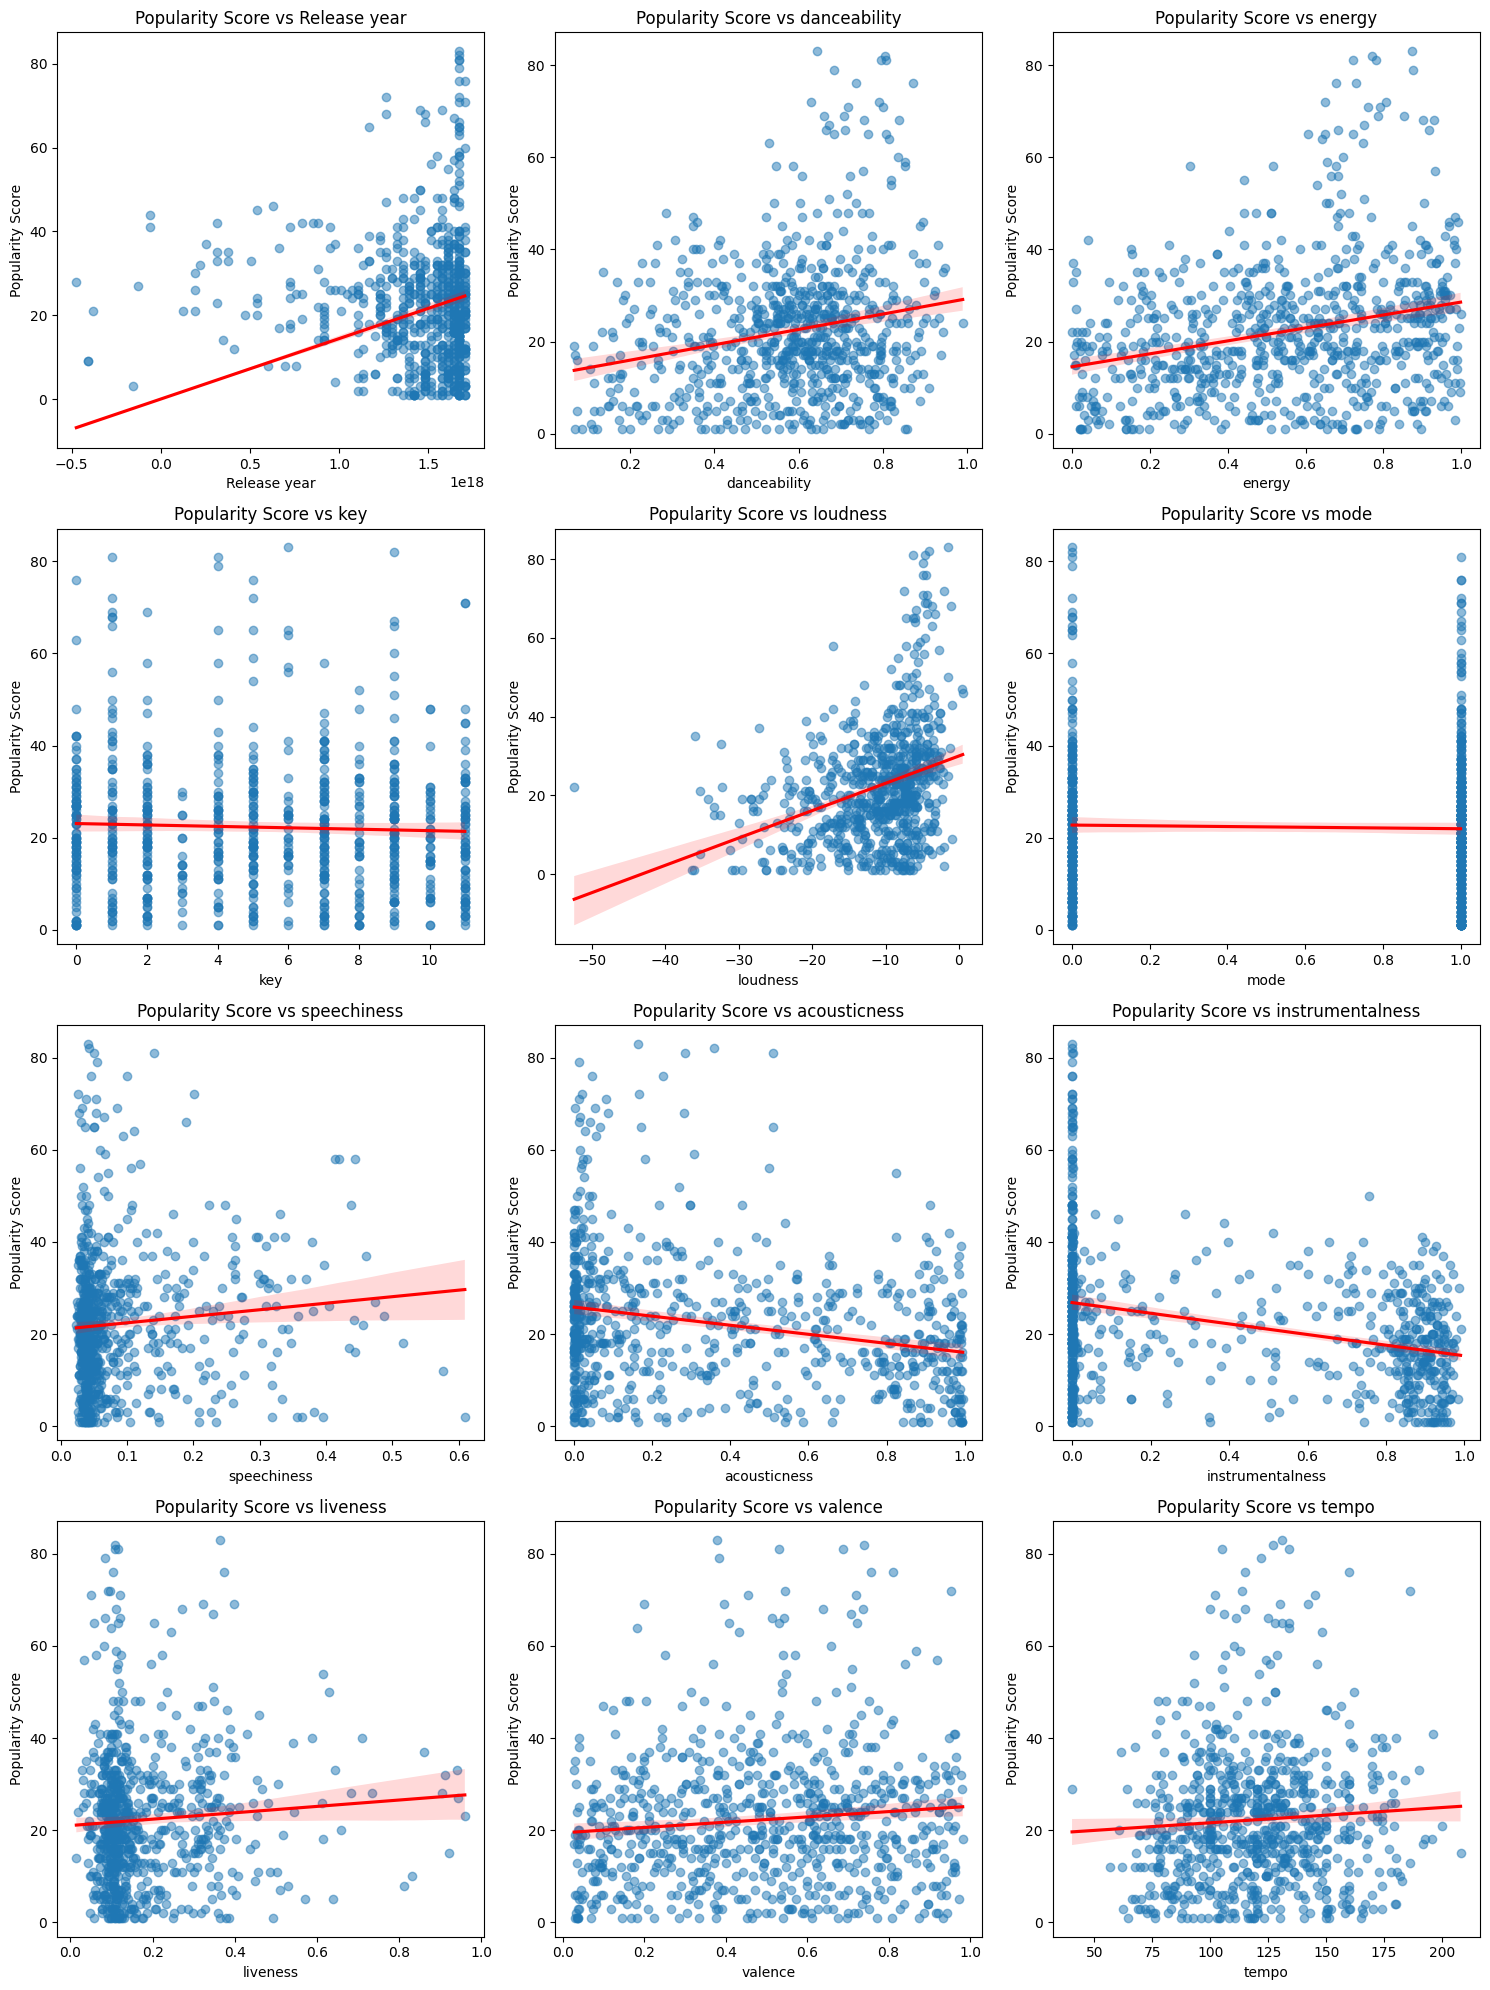

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have your filtered data stored in a DataFrame called 'filtered_df'
# Replace 'filtered_df' with the name of your DataFrame if it's different

# Convert 'Release year' to numeric
filtered_df['Release year'] = pd.to_numeric(filtered_df['Release year'])

# Define the features you want to include in the scatterplot
features = ['Release year', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Calculate number of rows and columns for subplots
num_rows = len(features) // 3 + (len(features) % 3 > 0)
num_cols = min(len(features), 3)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Flatten axes array if there is only one row
if num_rows == 1:
    axes = [axes]

# Loop through each feature and create a scatterplot with trend line
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    sns.regplot(x=feature, y='Popularity score', data=filtered_df, ax=axes[row][col], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    axes[row][col].set_title('Popularity Score vs ' + feature)
    axes[row][col].set_xlabel(feature)
    axes[row][col].set_ylabel('Popularity Score')

# Hide empty subplots
for i in range(len(features), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row][col].axis('off')

plt.tight_layout()
plt.show()


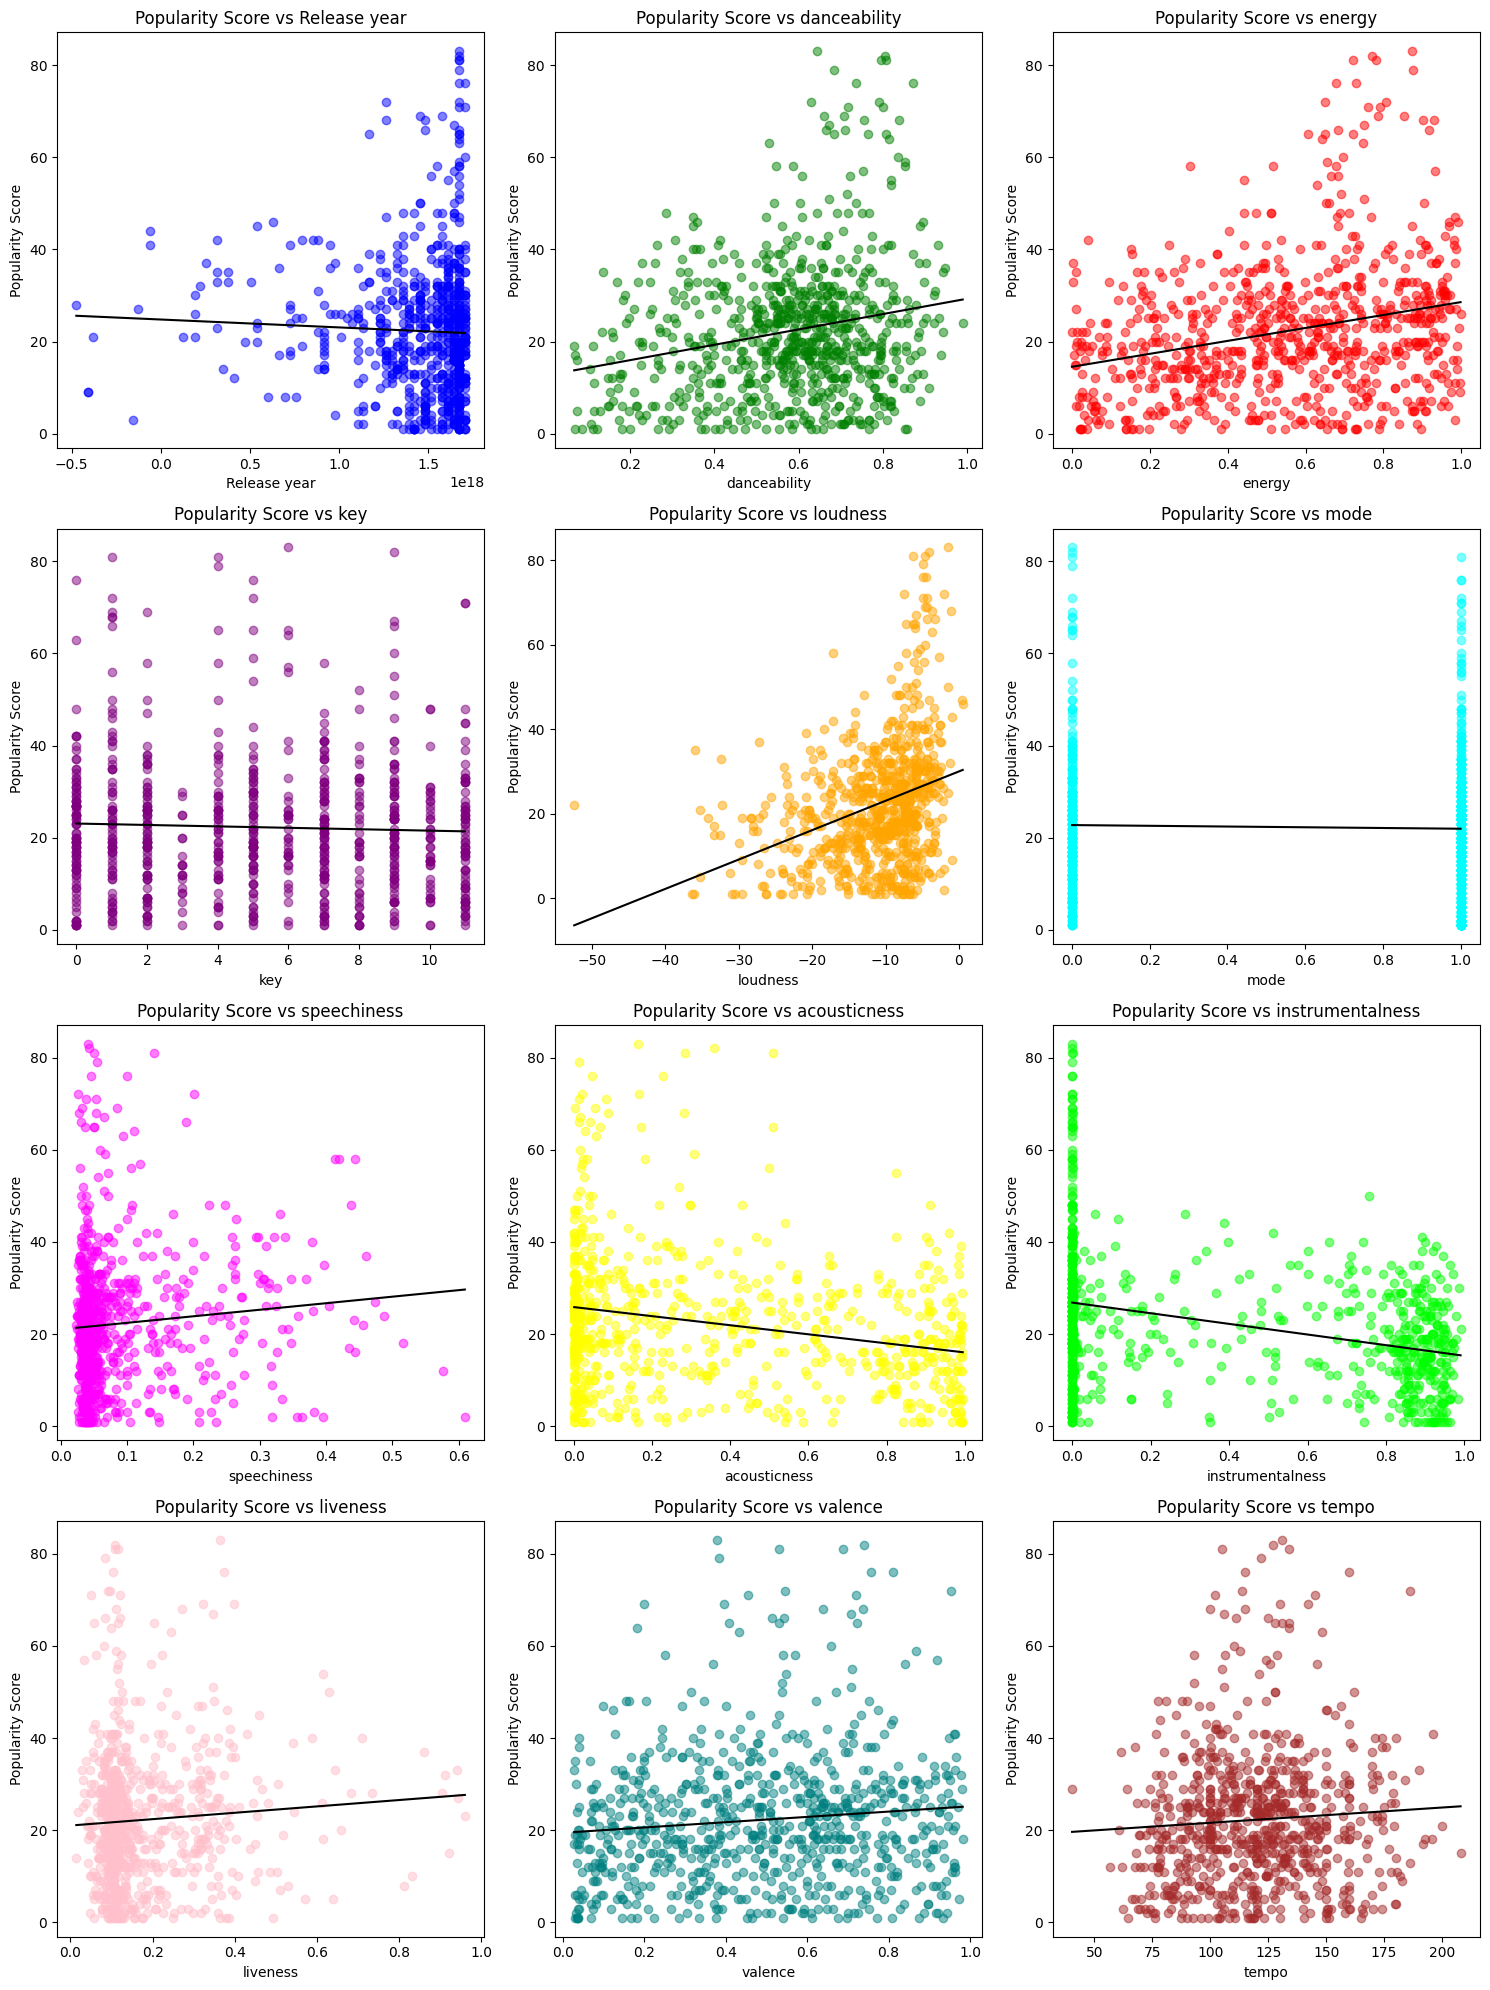

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your filtered data stored in a DataFrame called 'filtered_df'
# Replace 'filtered_df' with the name of your DataFrame if it's different

# Define the features you want to include in the scatterplot
features = ['Release year', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Define colors for scatterplots
scatter_colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'lime', 'pink', 'teal', 'brown']

# Calculate number of rows and columns for subplots
num_rows = len(features) // 3 + (len(features) % 3 > 0)
num_cols = min(len(features), 3)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Flatten axes array if there is only one row
if num_rows == 1:
    axes = [axes]

# Loop through each feature and create a scatterplot with trend line
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    axes[row][col].scatter(filtered_df[feature], filtered_df['Popularity score'], alpha=0.5, color=scatter_colors[i])
    axes[row][col].plot(np.unique(filtered_df[feature]), np.poly1d(np.polyfit(filtered_df[feature], filtered_df['Popularity score'], 1))(np.unique(filtered_df[feature])), color='black')
    axes[row][col].set_title('Popularity Score vs ' + feature)
    axes[row][col].set_xlabel(feature)
    axes[row][col].set_ylabel('Popularity Score')

# Hide empty subplots
for i in range(len(features), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row][col].axis('off')

plt.tight_layout()
plt.show()

==========================================================================================================

==========================================================================================================

==========================================================================================================

Trash Zone under


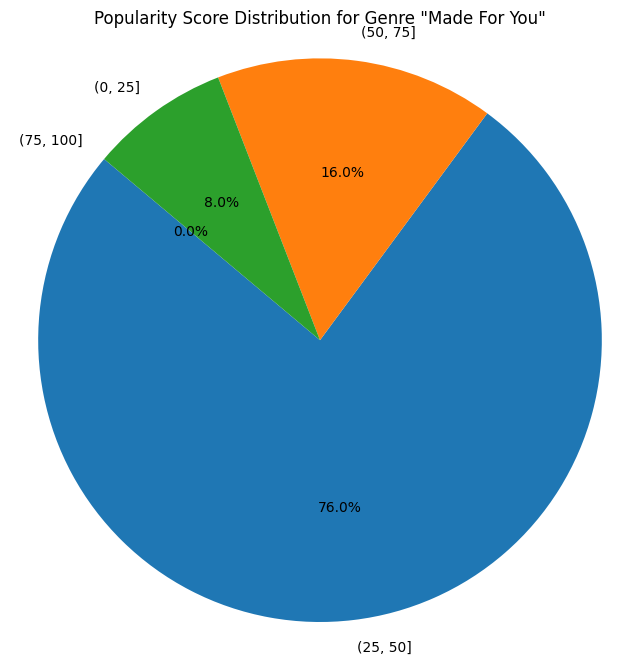

In [ ]:
# Assuming filtered_df contains the necessary data

# Filter the dataframe for the genre "Made For You"
genre_made_for_you = filtered_df[filtered_df['Genres'] == 'genres:"EQUAL"']

# Define the bins for Popularity Score groups
bins = [0, 25, 50, 75, 100]

# Group the data into bins
grouped = pd.cut(genre_made_for_you['Popularity score'], bins=bins).value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=140)
plt.title('Popularity Score Distribution for Genre "Made For You"')
plt.axis('equal')
plt.show()


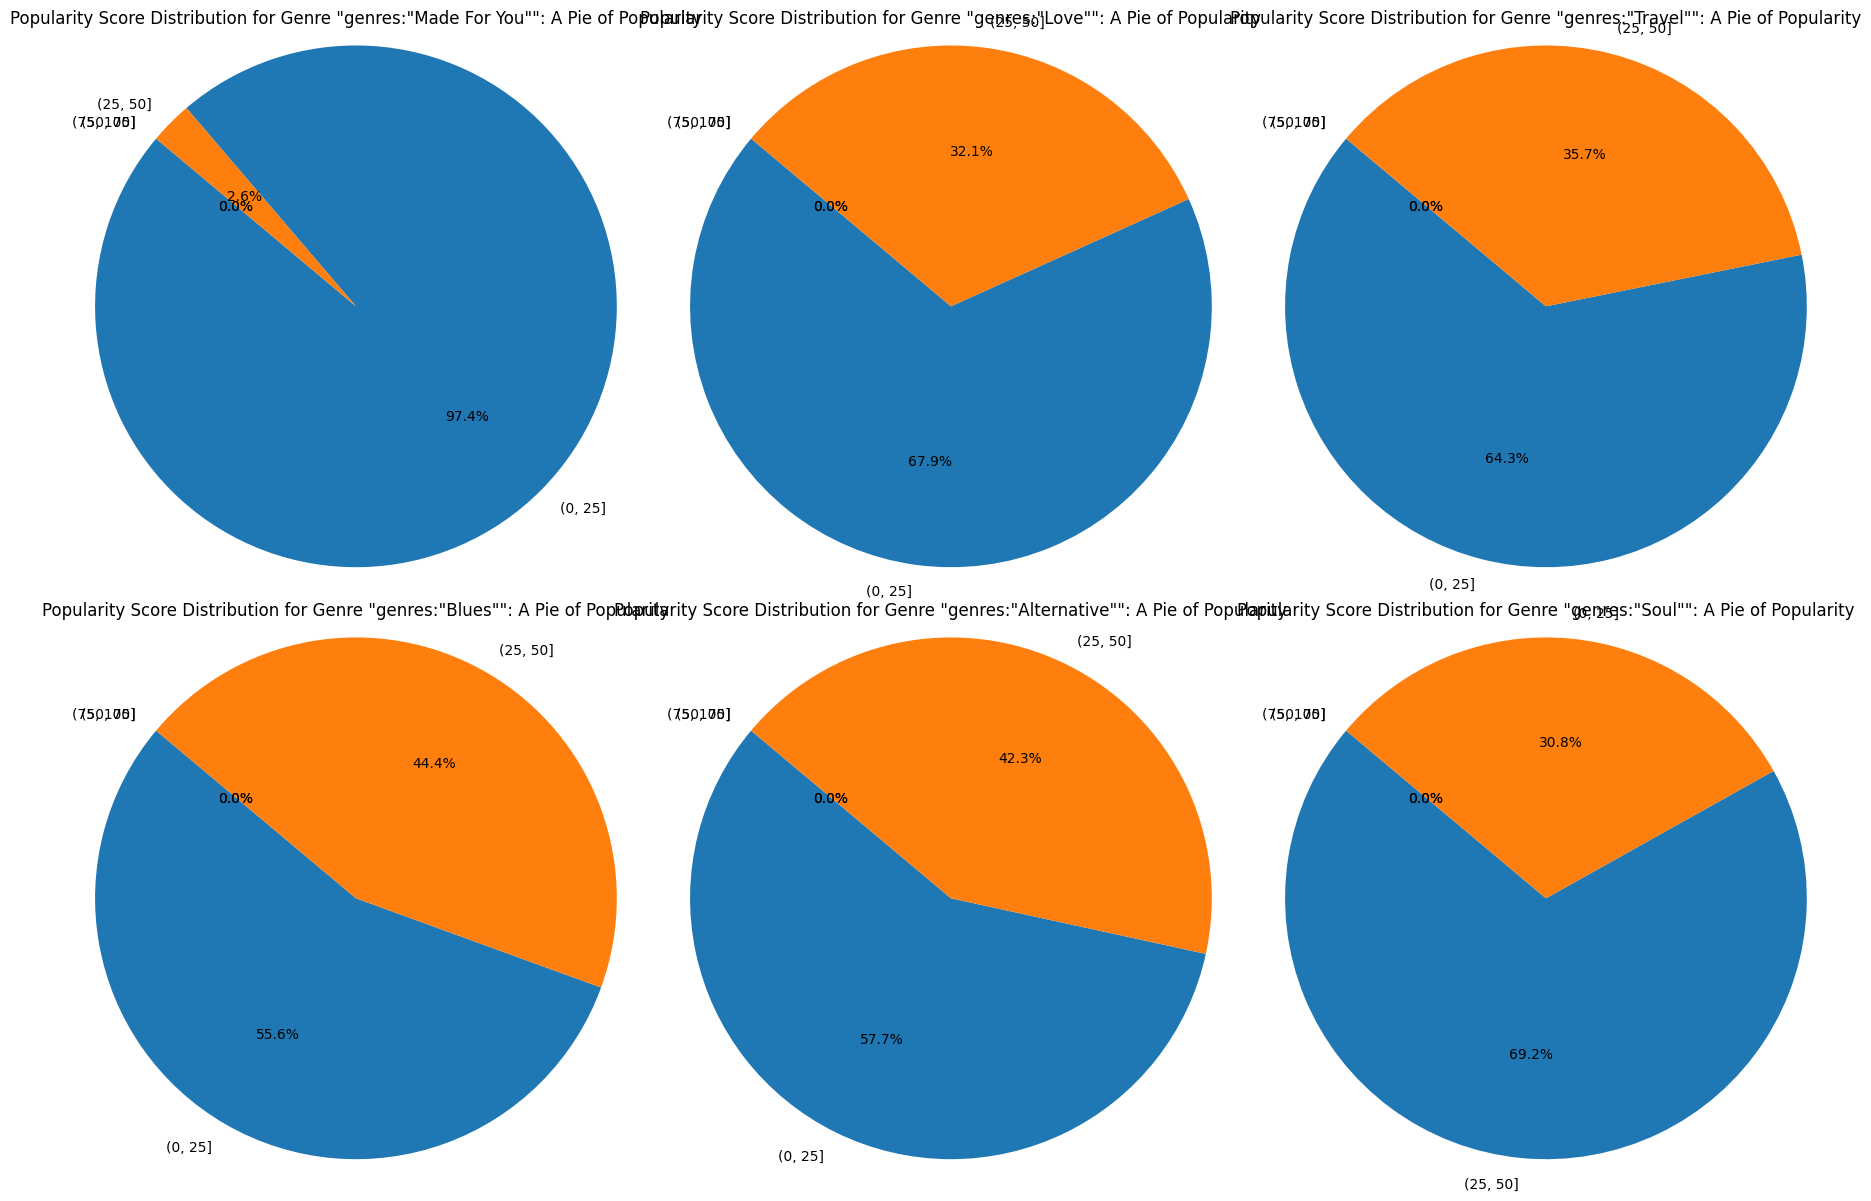

In [ ]:
# Define the genres
genres = ['genres:"Made For You"','genres:"Love"', 'genres:"Travel"', 'genres:"Blues"','genres:"Alternative"','genres:"Soul"']

# Define the bins for Popularity Score groups
bins = [0, 25, 50, 75, 100]

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Loop through each genre
for i, genre in enumerate(genres):
    # Filter the dataframe for the genre
    genre_df = filtered_df[filtered_df['Genres'] == genre]

    # Group the data into bins
    grouped = pd.cut(genre_df['Popularity score'], bins=bins).value_counts()

    # Plotting the pie chart
    ax = axs[i // 3, i % 3]
    ax.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Popularity Score Distribution for Genre "{genre}": A Pie of Popularity')
    ax.axis('equal')

plt.tight_layout()
plt.show()


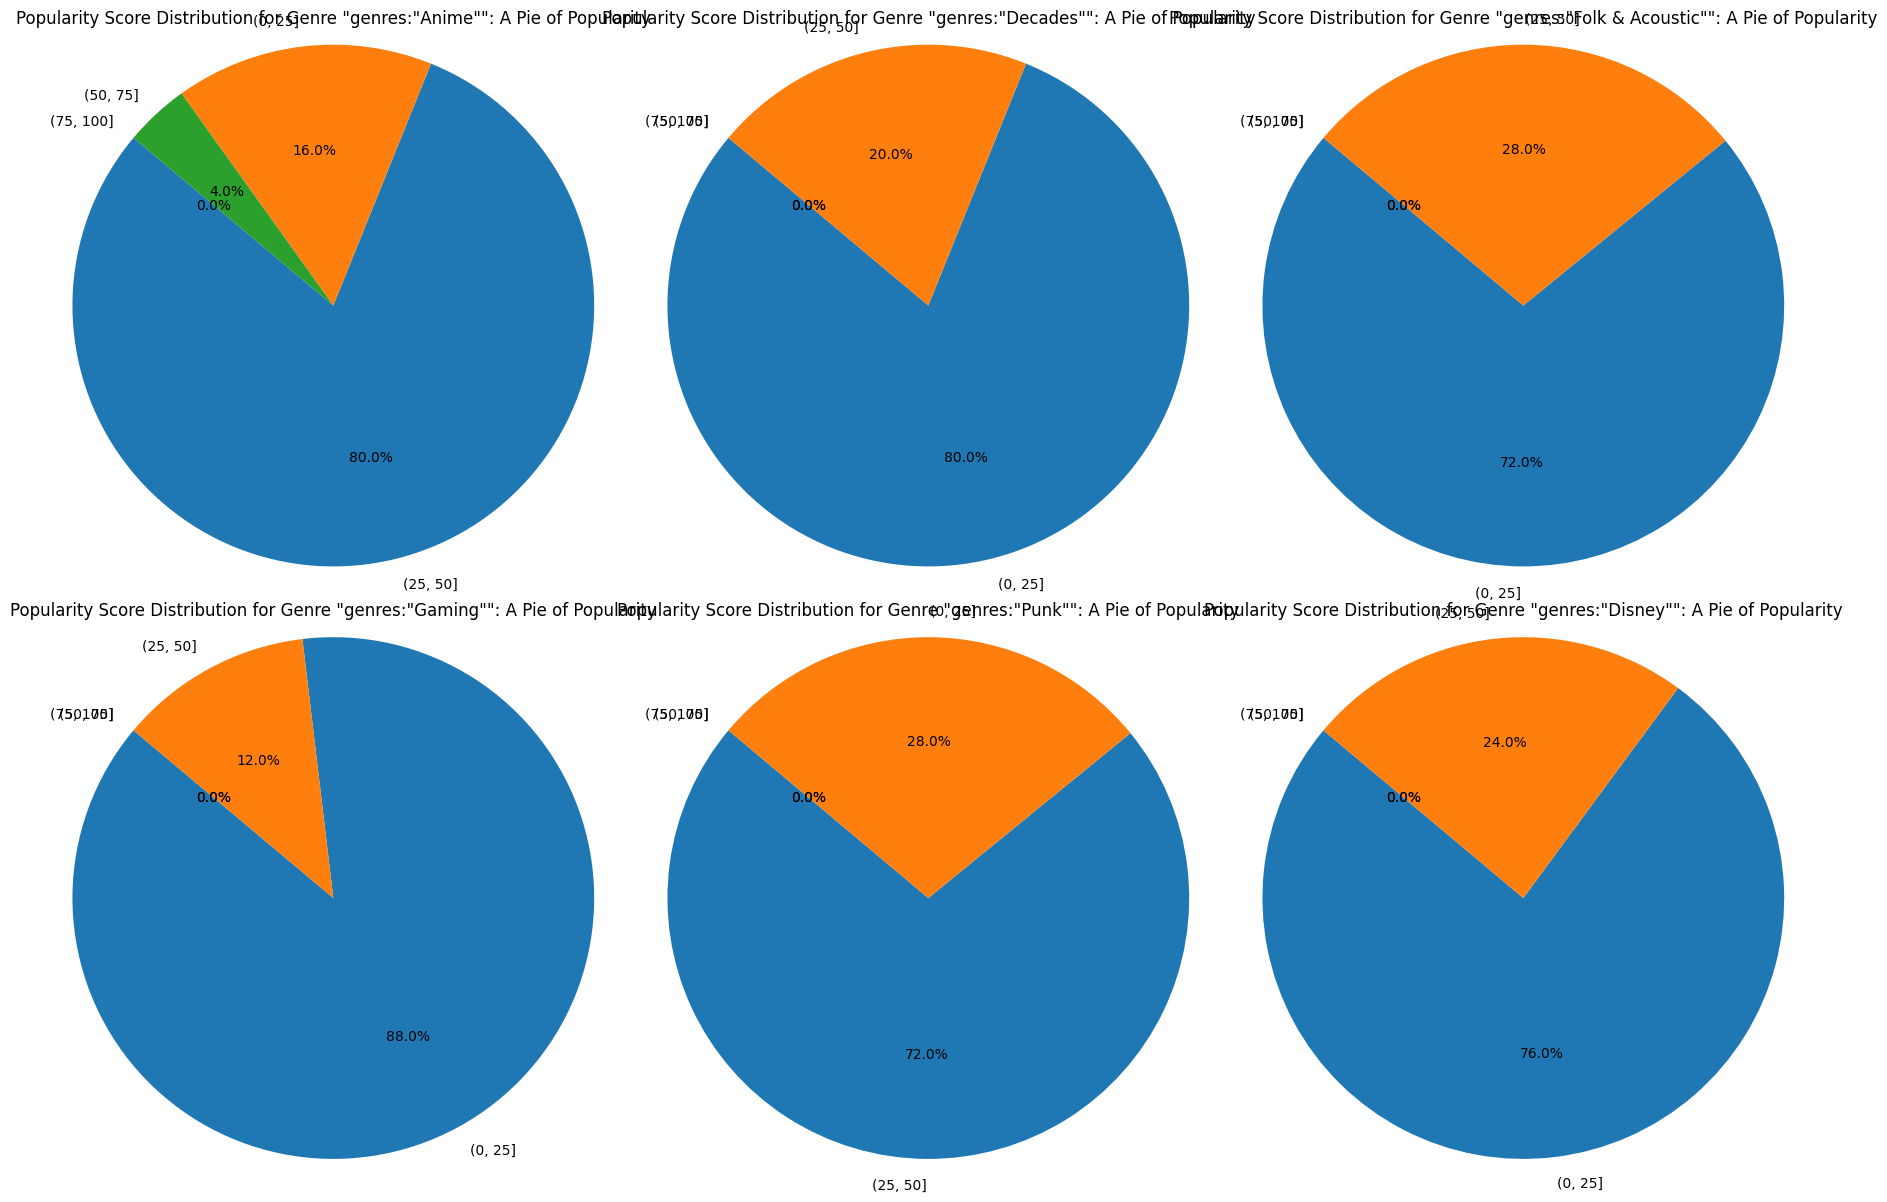

In [ ]:
# Define the genres
genres = ['genres:"Anime"','genres:"Decades"', 'genres:"Folk & Acoustic"', 'genres:"Gaming"','genres:"Punk"','genres:"Disney"']

# Define the bins for Popularity Score groups
bins = [0, 25, 50, 75, 100]

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Loop through each genre
for i, genre in enumerate(genres):
    # Filter the dataframe for the genre
    genre_df = filtered_df[filtered_df['Genres'] == genre]

    # Group the data into bins
    grouped = pd.cut(genre_df['Popularity score'], bins=bins).value_counts()

    # Plotting the pie chart
    ax = axs[i // 3, i % 3]
    ax.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Popularity Score Distribution for Genre "{genre}": A Pie of Popularity')
    ax.axis('equal')

plt.tight_layout()
plt.show()
